In [644]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import shap

import warnings
warnings.filterwarnings('ignore')

In [430]:
data = pd.read_csv("C:\\Users\patty\OneDrive\Documents\Fac\DESU\Projet perso pathologie\Data pathologie.csv", delimiter=";")

In [431]:
#prev= pourcentage de ntop sur npop
#ntop= nbr de personnes ayant la patho
#npop= pop de ref 

In [432]:
data.shape

(1048575, 16)

In [433]:
data.head()

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,ntop,npop,prev,niveau_prioritaire,libelle_classe_age,libelle_sexe,tri
0,2016,Diabète,Diabète,Diabète,top_FDiabet_ind,75-79,2,76,46,610.0,4230,14.509,"1,2,3",de 75 à 79 ans,femmes,2.0
1,2018,Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),top_ALDAutr_ind,00-04,1,1,971,210.0,10180,2.023,"1,2,3",de 0 à 4 ans,hommes,16.0
2,2016,Diabète,Diabète,Diabète,top_FDiabet_ind,75-79,2,76,82,730.0,4840,15.029,"1,2,3",de 75 à 79 ans,femmes,2.0
3,2018,Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),top_ALDAutr_ind,00-04,1,1,999,210.0,10180,2.023,"1,2,3",de 0 à 4 ans,hommes,16.0
4,2016,Diabète,Diabète,Diabète,top_FDiabet_ind,75-79,2,84,7,1040.0,6850,15.129,"1,2,3",de 75 à 79 ans,femmes,2.0


In [434]:
missing_values=data.isnull().sum()
missing_values.sort_values(ascending=False)
print(missing_values)

annee                      0
patho_niv1                 0
patho_niv2            162033
patho_niv3            286173
top                        0
cla_age_5                  0
sexe                       0
region                     0
dept                       0
ntop                  194507
npop                       0
prev                  194507
niveau_prioritaire         0
libelle_classe_age         0
libelle_sexe               0
tri                        0
dtype: int64


In [435]:
columns_to_drop = ['libelle_sexe', 'libelle_classe_age', 'top', 'tri','niveau_prioritaire']
data.drop(columns=columns_to_drop, inplace=True)

data.shape

(1048575, 11)

In [436]:
data.head()

,annee,patho_niv1,patho_niv2,patho_niv3,cla_age_5,sexe,region,dept,ntop,npop,prev
0,2016,Diabète,Diabète,Diabète,75-79,2,76,46,610.0,4230,14.509
1,2018,Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),00-04,1,1,971,210.0,10180,2.023
2,2016,Diabète,Diabète,Diabète,75-79,2,76,82,730.0,4840,15.029
3,2018,Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),00-04,1,1,999,210.0,10180,2.023
4,2016,Diabète,Diabète,Diabète,75-79,2,84,7,1040.0,6850,15.129


In [437]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   annee       1048575 non-null  int64  
 1   patho_niv1  1048575 non-null  object 
 2   patho_niv2  886542 non-null   object 
 3   patho_niv3  762402 non-null   object 
 4   cla_age_5   1048575 non-null  object 
 5   sexe        1048575 non-null  int64  
 6   region      1048575 non-null  int64  
 7   dept        1048575 non-null  object 
 8   ntop        854068 non-null   float64
 9   npop        1048575 non-null  int64  
 10  prev        854068 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 88.0+ MB


Femme=2
Homme=1
Tous sexes=9

## Visualisation data

### Boxplot

<Axes: >

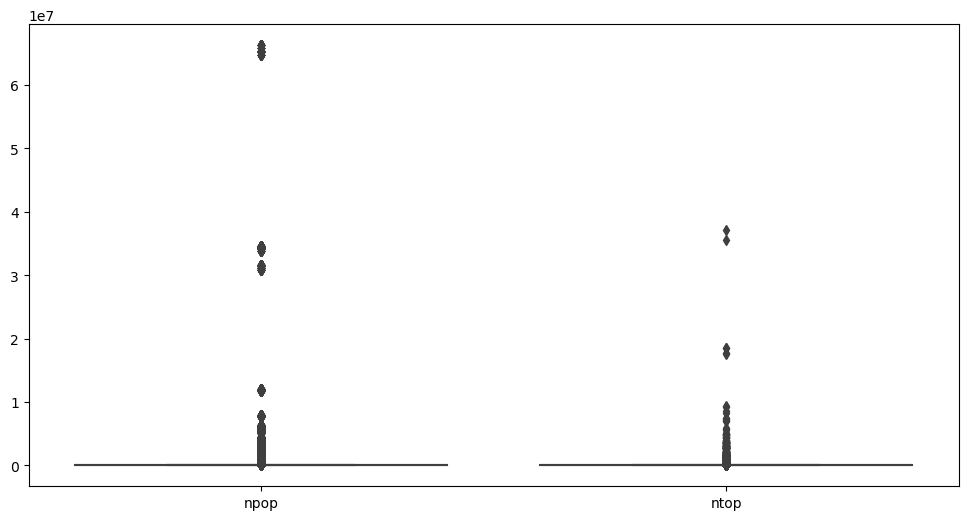

In [439]:
plt.figure(figsize=(12, 6))
data_plot = data[['npop','ntop']]
sns.boxplot(data_plot)

Nous pouvons voir que le nombre de la population et le nombre de personnes ayant une maladie possèdent des valeurs qui se trouve hors des moustaches. Ceci est normal car on parle du nombre et d'effectif, ce ne sont pas des valeurs aberrantes. On retrouve la même chose pour la prévalence ce qui est logique

<Axes: >

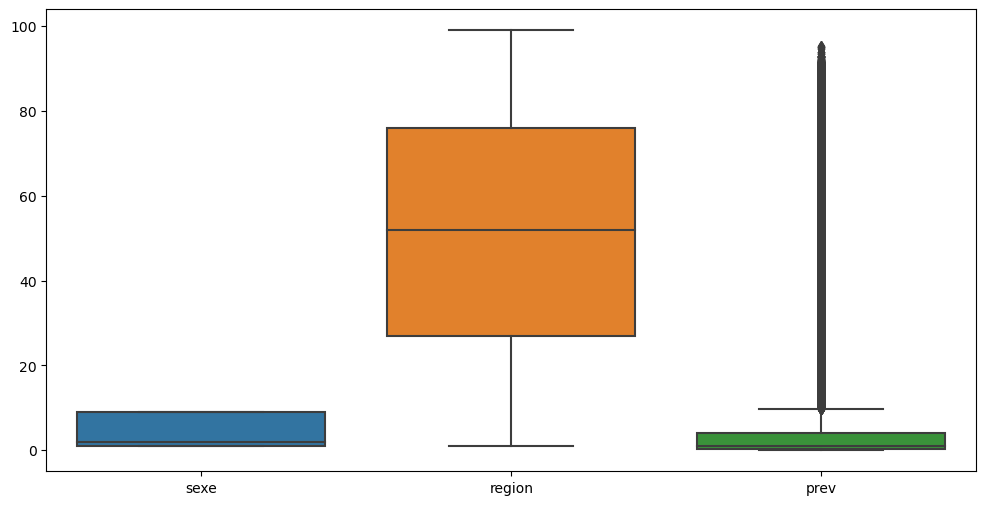

In [440]:
plt.figure(figsize=(12, 6))
data_plot1 = data[['sexe','region','prev']]
sns.boxplot(data_plot1)

### Nom des items dans une variable

In [441]:
data.head()

,annee,patho_niv1,patho_niv2,patho_niv3,cla_age_5,sexe,region,dept,ntop,npop,prev
0,2016,Diabète,Diabète,Diabète,75-79,2,76,46,610.0,4230,14.509
1,2018,Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),00-04,1,1,971,210.0,10180,2.023
2,2016,Diabète,Diabète,Diabète,75-79,2,76,82,730.0,4840,15.029
3,2018,Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),Autres affections de longue durée (dont 31 et 32),00-04,1,1,999,210.0,10180,2.023
4,2016,Diabète,Diabète,Diabète,75-79,2,84,7,1040.0,6850,15.129


In [443]:
unique_values = data['dept'].unique()
unique_values.sort()  # Triez les valeurs uniques par ordre alphabétique

print(unique_values)

['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '21' '22' '23'
 '24' '25' '26' '27' '28' '29' '2A' '2B' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62'
 '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75' '76'
 '77' '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89' '9'
 '90' '91' '92' '93' '94' '95' '971' '972' '973' '974' '976' '999']


In [444]:
data['dept'] = data['dept'].replace('2A', '96')
data['dept'] = data['dept'].replace('2B', '97')

In [445]:
correspondance = {
    'Diabète': 'Diabète',
    'Autres affections de longue durée (dont 31 et 32)': 'Autres affections de longue durée',
    'Hospitalisations ponctuelles (avec ou sans pathologies, traitements ou maternité)':'Hospitalisations ponctuelles',
    'Cancers':'Cancers', 'Insuffisance rénale chronique terminale':'Insuffisance rénale chronique terminale',
    'Traitements psychotropes (hors pathologies)':'Traitements psychotropes','Maladies psychiatriques':'Maladies psychiatriques',
    'Maladies neurologiques ou dégénératives':'Maladies neurologiques ou dégénératives',
    'Pas de pathologies repérées, traitements, maternité, hospitalisations ni traitement antalgique ou anti-inflammatoire':'Pas de pathologies repérées',
    'Traitement antalgique ou anti-inflammatoire (hors pathologies, traitements, maternité ou hospitalisations)':'Traitement antalgique',
    'Traitements du risque vasculaire (hors pathologies)':'Traitements du risque vasculaire','Maladies respiratoires chroniques (hors mucoviscidose)':'Maladies respiratoires chroniques',
     'Maternité (avec ou sans pathologies)': 'Maternité','Maladies cardio-neurovasculaires':'Maladies cardio-neurovasculaires',
    'Maladies du foie ou du pancréas (hors mucoviscidose)':'Maladies du foie ou du pancréas', 'Maladies inflammatoires VIH ou SIDA': 'Maladies inflammatoires ou rares ou VIH ou SIDA',
    'Séjours en hospitalisation complète pour prise en charge de la Covid-19':'Covid-19'
    
}

data['patho_niv1'] = data['patho_niv1'].replace(correspondance)

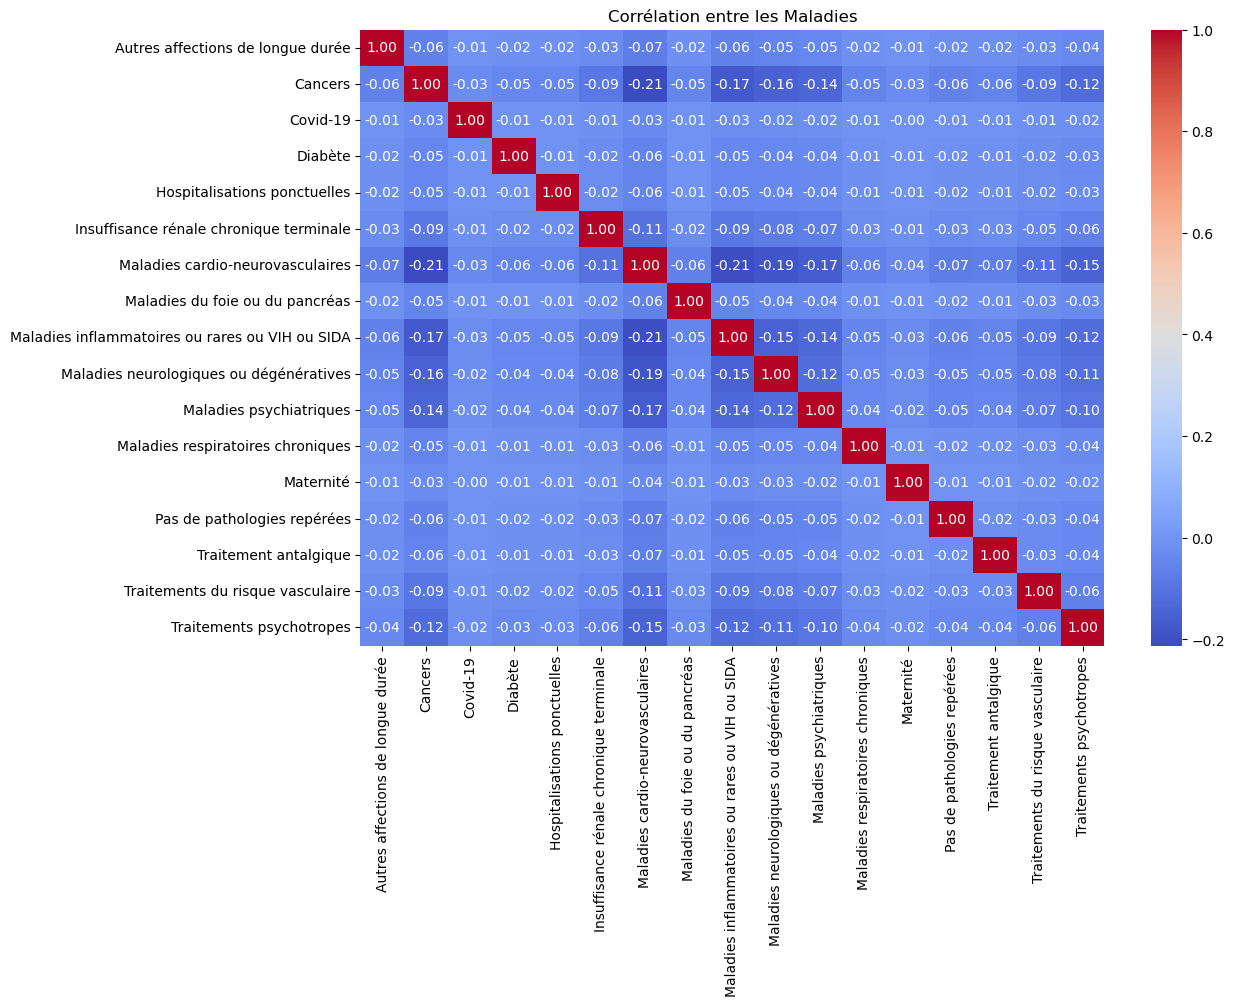

In [446]:
unique_maladies = data['patho_niv1'].str.get_dummies(sep=', ')

# Ensuite, calculez la matrice de corrélation entre ces colonnes binaires
correlation_matrix = unique_maladies.corr()

plt.figure(figsize=(12, 8))

# Utilisez Seaborn pour créer une heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajoutez un titre à la heatmap
plt.title('Corrélation entre les Maladies')
# Affichez la heatmap
plt.show()

In [447]:
unique_values = data['cla_age_5'].unique()
print(unique_values)

['75-79' '00-04' '80-84' '05-sept' '85-89' 'oct-14' '90-94' '15-19'
 '95et+' '20-24' 'tsage' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54'
 '55-59' '60-64' '65-69' '70-74']


### Effectif des pathologies 1 dans data

In [448]:
effectif_patho_niv1 = data['patho_niv1'].value_counts()
print(effectif_patho_niv1)

Maladies cardio-neurovasculaires                   213031
Cancers                                            157414
Maladies inflammatoires ou rares ou VIH ou SIDA    150467
Maladies neurologiques ou dégénératives            125906
Maladies psychiatriques                            103364
Traitements psychotropes                            83184
Traitements du risque vasculaire                    48741
Insuffisance rénale chronique terminale             43573
Pas de pathologies repérées                         20411
Autres affections de longue durée                   20260
Traitement antalgique                               17854
Maladies respiratoires chroniques                   16016
Maladies du foie ou du pancréas                     13441
Diabète                                             12567
Hospitalisations ponctuelles                        12524
Maternité                                            5126
Covid-19                                             4696
Name: patho_ni

### Différentes fréquences des variables en Barplot

### Sex

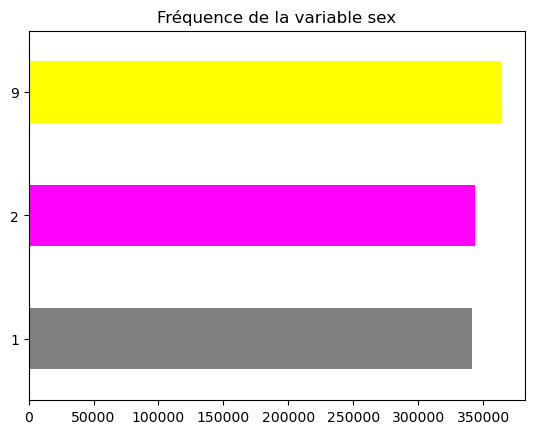

In [449]:
sexe_counts = data['sexe'].value_counts().sort_values()
colors = ['grey', 'magenta', 'yellow']  
data['sexe'].value_counts().sort_values().plot(kind = "barh", 
                                                    title = "Fréquence de la variable sex",color=colors);

### Pathologies 1 

<Axes: title={'center': 'Fréquence de la variable patho global'}>

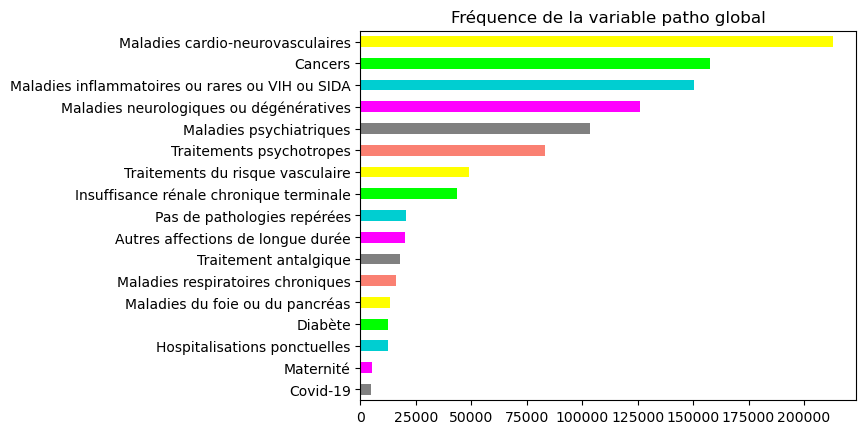

In [450]:
patho1_counts = data['patho_niv1'].value_counts().sort_values()
patho1_counts.plot(kind="barh", title="Fréquence de la variable patho global", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )


### Pathologies 2 et 3

<Axes: title={'center': 'Fréquence de la variable sous patho '}>

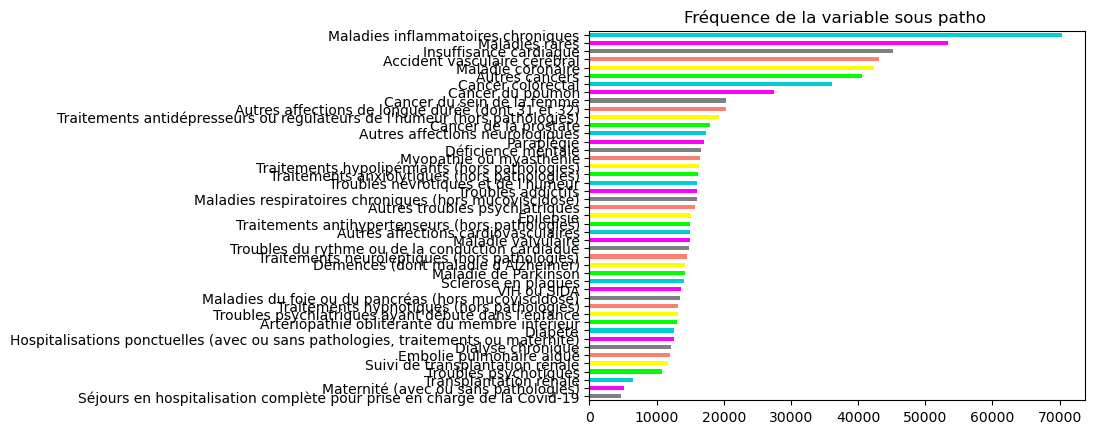

In [451]:
patho2_counts = data['patho_niv2'].value_counts().sort_values()
patho2_counts.plot(kind="barh", title="Fréquence de la variable sous patho ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

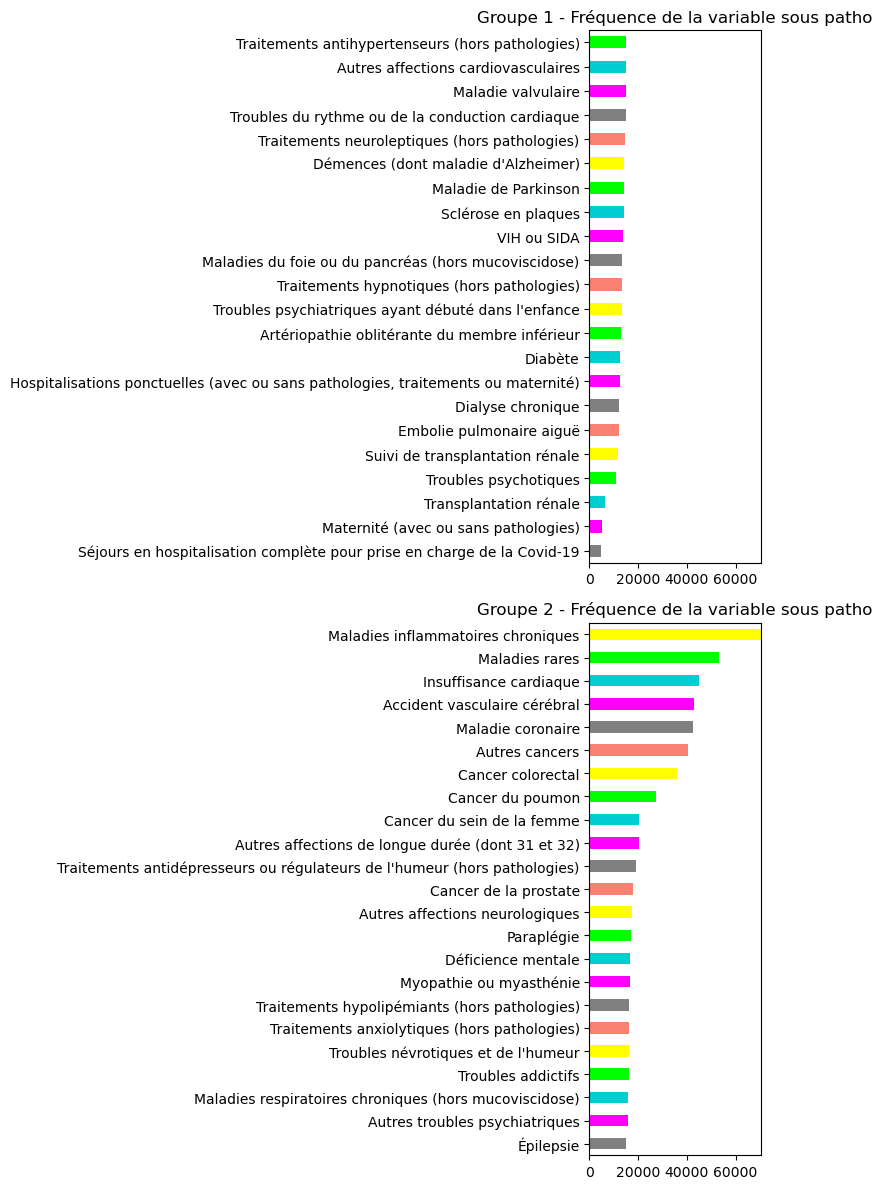

In [452]:
patho2_counts = data['patho_niv2'].value_counts().sort_values()

group1 = patho2_counts.iloc[:22]
group2 = patho2_counts.iloc[22:]

fig, axes = plt.subplots(2, 1, figsize=(8, 12))
max_frequency = max(group1.max(), group2.max())

group1.plot(kind="barh", title="Groupe 1 - Fréquence de la variable sous patho", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'], ax=axes[0])
axes[0].set_xlim(0, max_frequency)
group2.plot(kind="barh", title="Groupe 2 - Fréquence de la variable sous patho", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'], ax=axes[1])
axes[1].set_xlim(0, max_frequency)

plt.tight_layout()

plt.show()

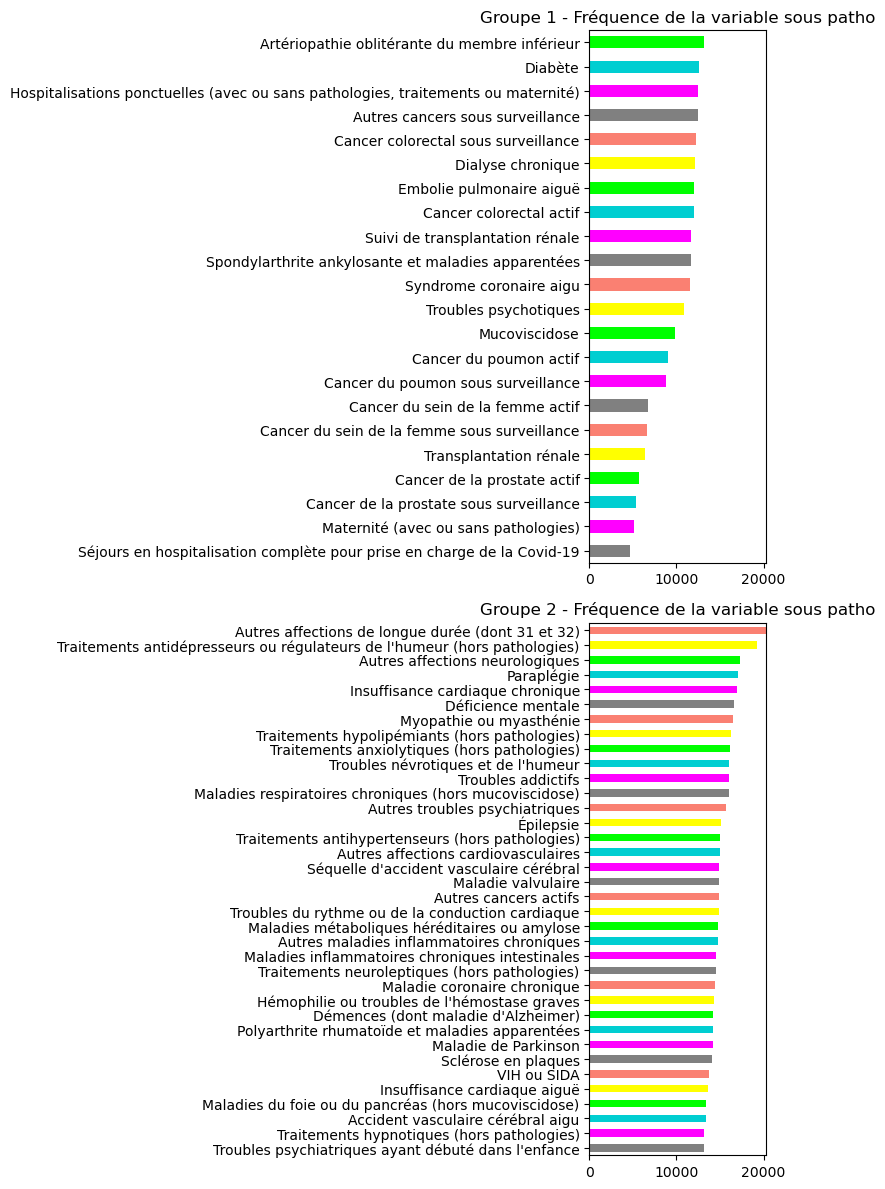

In [453]:
patho3_counts = data['patho_niv3'].value_counts().sort_values()

group1 = patho3_counts.iloc[:22]
group2 = patho3_counts.iloc[22:]

fig, axes = plt.subplots(2, 1, figsize=(8, 12))
max_frequency = max(group1.max(), group2.max())

group1.plot(kind="barh", title="Groupe 1 - Fréquence de la variable sous patho", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'], ax=axes[0])
axes[0].set_xlim(0, max_frequency)
group2.plot(kind="barh", title="Groupe 2 - Fréquence de la variable sous patho", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'], ax=axes[1])
axes[1].set_xlim(0, max_frequency)

plt.tight_layout()

plt.show()

### Année

<Axes: title={'center': 'Fréquence des années '}>

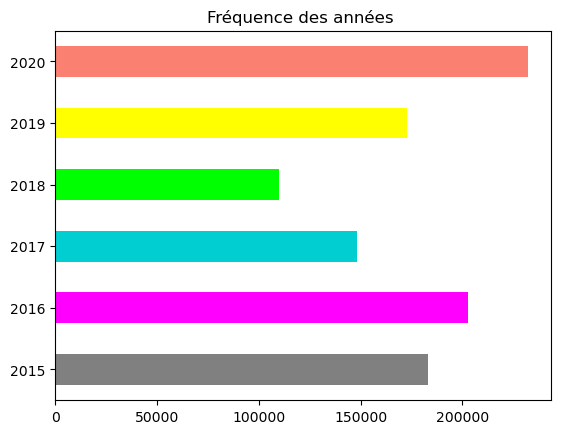

In [454]:
annee_counts = data['annee'].value_counts().sort_index()
annee_counts.plot(kind="barh", title="Fréquence des années ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

### Age

<Axes: title={'center': "Fréquence des tranches d'âges "}>

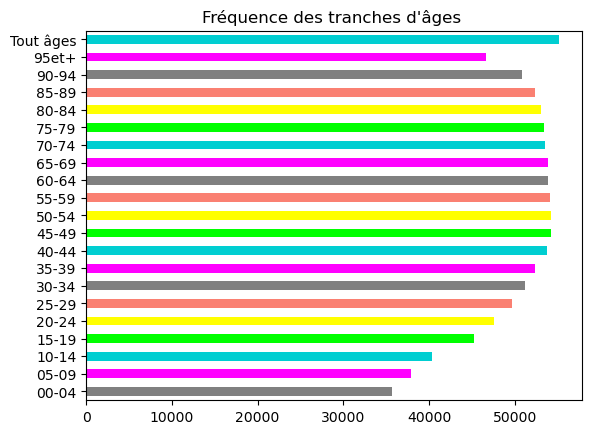

In [455]:
data['cla_age_5'] = data['cla_age_5'].replace('oct-14', '10-14')
data['cla_age_5'] = data['cla_age_5'].replace('05-sept', '05-09')
data['cla_age_5'] = data['cla_age_5'].replace('tsage', 'Tout âges')

cla_age_5_counts = data['cla_age_5'].value_counts().sort_index()
cla_age_5_counts.plot(kind="barh", title="Fréquence des tranches d'âges ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

# Création des deux dataframes

## Cancer

In [456]:
data_cancers = data[data['patho_niv1'] == 'Cancers']

In [457]:
effectif_patho_cancer_niv2 = data_cancers['patho_niv2'].value_counts()
print(effectif_patho_cancer_niv2)

Autres cancers                40633
Cancer colorectal             36104
Cancer du poumon              27499
Cancer du sein de la femme    20301
Cancer de la prostate         18001
Name: patho_niv2, dtype: int64


In [458]:
effectif_patho_niv3 = data_cancers['patho_niv3'].value_counts()
print(effectif_patho_niv3)

Autres cancers actifs                           14890
Autres cancers sous surveillance                12503
Cancer colorectal sous surveillance             12231
Cancer colorectal actif                         12026
Cancer du poumon actif                           9016
Cancer du poumon sous surveillance               8774
Cancer du sein de la femme actif                 6747
Cancer du sein de la femme sous surveillance     6573
Cancer de la prostate actif                      5698
Cancer de la prostate sous surveillance          5318
Name: patho_niv3, dtype: int64


In [459]:
missing_values=data_cancers.isnull().sum()
missing_values.sort_values(ascending=False)
print(missing_values)

annee             0
patho_niv1        0
patho_niv2    14876
patho_niv3    63638
cla_age_5         0
sexe              0
region            0
dept              0
ntop          31189
npop              0
prev          31189
dtype: int64


In [460]:
data_cancers['patho_niv2'].fillna("Cancers", inplace=True)
data_cancers['patho_niv3'].fillna("Cancers", inplace=True)

In [461]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data_cancers['ntop'] = imp.fit_transform(data_cancers['ntop'].values.reshape(-1,1))

data_cancers['prev'] = imp.fit_transform(data_cancers['prev'].values.reshape(-1,1))
data_cancers.isnull().sum()

annee         0
patho_niv1    0
patho_niv2    0
patho_niv3    0
cla_age_5     0
sexe          0
region        0
dept          0
ntop          0
npop          0
prev          0
dtype: int64

## Maladies cardio-neurovasculaires

In [462]:
data_cardio = data[data['patho_niv1'] == 'Maladies cardio-neurovasculaires']

In [463]:
effectif_patho_cardio_niv2 = data_cardio['patho_niv2'].value_counts()
print(effectif_patho_cardio_niv2)

Insuffisance cardiaque                              45131
Accident vasculaire cérébral                        43136
Maladie coronaire                                   42329
Autres affections cardiovasculaires                 14973
Maladie valvulaire                                  14893
Troubles du rythme ou de la conduction cardiaque    14850
Artériopathie oblitérante du membre inférieur       13105
Embolie pulmonaire aiguë                            12041
Name: patho_niv2, dtype: int64


In [464]:
effectif_patho_cardio_niv3 = data_cardio['patho_niv3'].value_counts()
print(effectif_patho_cardio_niv3)

Insuffisance cardiaque chronique                    16940
Autres affections cardiovasculaires                 14973
Séquelle d'accident vasculaire cérébral             14913
Maladie valvulaire                                  14893
Troubles du rythme ou de la conduction cardiaque    14850
Maladie coronaire chronique                         14393
Insuffisance cardiaque aiguë                        13586
Accident vasculaire cérébral aigu                   13379
Artériopathie oblitérante du membre inférieur       13105
Embolie pulmonaire aiguë                            12041
Syndrome coronaire aigu                             11541
Name: patho_niv3, dtype: int64


In [465]:
missing_values=data_cardio.isnull().sum()
missing_values.sort_values(ascending=False)
print(missing_values)

annee             0
patho_niv1        0
patho_niv2    12573
patho_niv3    58417
cla_age_5         0
sexe              0
region            0
dept              0
ntop          46275
npop              0
prev          46275
dtype: int64


In [466]:
data_cardio['patho_niv2'].fillna("Maladies cardio-neurovasculaires", inplace=True)
data_cardio['patho_niv3'].fillna("Maladies cardio-neurovasculaires", inplace=True)

In [467]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data_cardio['ntop'] = imp.fit_transform(data_cardio['ntop'].values.reshape(-1,1))

data_cardio['prev'] = imp.fit_transform(data_cardio['prev'].values.reshape(-1,1))
data_cardio.isnull().sum()

annee         0
patho_niv1    0
patho_niv2    0
patho_niv3    0
cla_age_5     0
sexe          0
region        0
dept          0
ntop          0
npop          0
prev          0
dtype: int64

## Maladies psychiatriques

In [468]:
data_maladie_psychiatrique = data[data['patho_niv1'] == 'Maladies psychiatriques']

In [469]:
# Obtenir les effectifs des différentes valeurs de patho_niv2
effectif_patho_niv2 = data_maladie_psychiatrique['patho_niv2'].value_counts()
print(effectif_patho_niv2)

Déficience mentale                                     16553
Troubles névrotiques et de l'humeur                    16061
Troubles addictifs                                     16037
Autres troubles psychiatriques                         15646
Troubles psychiatriques ayant débuté dans l'enfance    13195
Troubles psychotiques                                  10866
Name: patho_niv2, dtype: int64


In [470]:
# Obtenir les effectifs des différentes valeurs de patho_niv3
effectif_patho_niv3 = data_maladie_psychiatrique['patho_niv3'].value_counts()
print(effectif_patho_niv3)

Déficience mentale                                     16553
Troubles névrotiques et de l'humeur                    16061
Troubles addictifs                                     16037
Autres troubles psychiatriques                         15646
Troubles psychiatriques ayant débuté dans l'enfance    13195
Troubles psychotiques                                  10866
Name: patho_niv3, dtype: int64


In [471]:
missing_values=data_maladie_psychiatrique.isnull().sum()
missing_values.sort_values(ascending=False)
print(missing_values)

annee             0
patho_niv1        0
patho_niv2    15006
patho_niv3    15006
cla_age_5         0
sexe              0
region            0
dept              0
ntop          14734
npop              0
prev          14734
dtype: int64


In [472]:
data_maladie_psychiatrique['patho_niv2'].fillna("Maladies psychiatriques", inplace=True)
data_maladie_psychiatrique['patho_niv3'].fillna("Maladies psychiatriques", inplace=True)

In [473]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data_maladie_psychiatrique['ntop'] = imp.fit_transform(data_maladie_psychiatrique['ntop'].values.reshape(-1,1))

data_maladie_psychiatrique['prev'] = imp.fit_transform(data_maladie_psychiatrique['prev'].values.reshape(-1,1))
data_maladie_psychiatrique.isnull().sum()

annee         0
patho_niv1    0
patho_niv2    0
patho_niv3    0
cla_age_5     0
sexe          0
region        0
dept          0
ntop          0
npop          0
prev          0
dtype: int64

In [474]:
data_maladie_psychiatrique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103364 entries, 13201 to 1048574
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   annee       103364 non-null  int64  
 1   patho_niv1  103364 non-null  object 
 2   patho_niv2  103364 non-null  object 
 3   patho_niv3  103364 non-null  object 
 4   cla_age_5   103364 non-null  object 
 5   sexe        103364 non-null  int64  
 6   region      103364 non-null  int64  
 7   dept        103364 non-null  object 
 8   ntop        103364 non-null  float64
 9   npop        103364 non-null  int64  
 10  prev        103364 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 9.5+ MB


## Maladies neurologiques ou dégénératives

In [475]:
data_maladie_neuro = data[data['patho_niv1'] == 'Maladies neurologiques ou dégénératives']

In [476]:
# Obtenir les effectifs des différentes valeurs de patho_niv2
effectif_patho_niv2 = data_maladie_neuro['patho_niv2'].value_counts()
print(effectif_patho_niv2)

Autres affections neurologiques        17281
Paraplégie                             17067
Myopathie ou myasthénie                16528
Épilepsie                              15096
Démences (dont maladie d'Alzheimer)    14230
Maladie de Parkinson                   14169
Sclérose en plaques                    14085
Name: patho_niv2, dtype: int64


In [477]:
effectif_patho_niv3 = data_maladie_neuro['patho_niv3'].value_counts()
print(effectif_patho_niv3)

Autres affections neurologiques        17281
Paraplégie                             17067
Myopathie ou myasthénie                16528
Épilepsie                              15096
Démences (dont maladie d'Alzheimer)    14230
Maladie de Parkinson                   14169
Sclérose en plaques                    14085
Name: patho_niv3, dtype: int64


In [478]:
missing_values=data_maladie_neuro.isnull().sum()
missing_values.sort_values(ascending=False)
print(missing_values)

annee             0
patho_niv1        0
patho_niv2    17450
patho_niv3    17450
cla_age_5         0
sexe              0
region            0
dept              0
ntop          28312
npop              0
prev          28312
dtype: int64


In [479]:
data_maladie_neuro['patho_niv2'].fillna('Maladies neurologiques ou dégénératives', inplace=True)
data_maladie_neuro['patho_niv3'].fillna('Maladies neurologiques ou dégénératives', inplace=True)

In [480]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data_maladie_neuro['ntop'] = imp.fit_transform(data_maladie_neuro['ntop'].values.reshape(-1,1))

data_maladie_neuro['prev'] = imp.fit_transform(data_maladie_neuro['prev'].values.reshape(-1,1))
data_maladie_neuro.isnull().sum()

annee         0
patho_niv1    0
patho_niv2    0
patho_niv3    0
cla_age_5     0
sexe          0
region        0
dept          0
ntop          0
npop          0
prev          0
dtype: int64

In [481]:
data_maladie_neuro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125906 entries, 19917 to 1018793
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   annee       125906 non-null  int64  
 1   patho_niv1  125906 non-null  object 
 2   patho_niv2  125906 non-null  object 
 3   patho_niv3  125906 non-null  object 
 4   cla_age_5   125906 non-null  object 
 5   sexe        125906 non-null  int64  
 6   region      125906 non-null  int64  
 7   dept        125906 non-null  object 
 8   ntop        125906 non-null  float64
 9   npop        125906 non-null  int64  
 10  prev        125906 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 11.5+ MB


## Visu Maladie_data et Maladie_data2

<Axes: title={'center': 'Fréquence de la variable patho 2 '}>

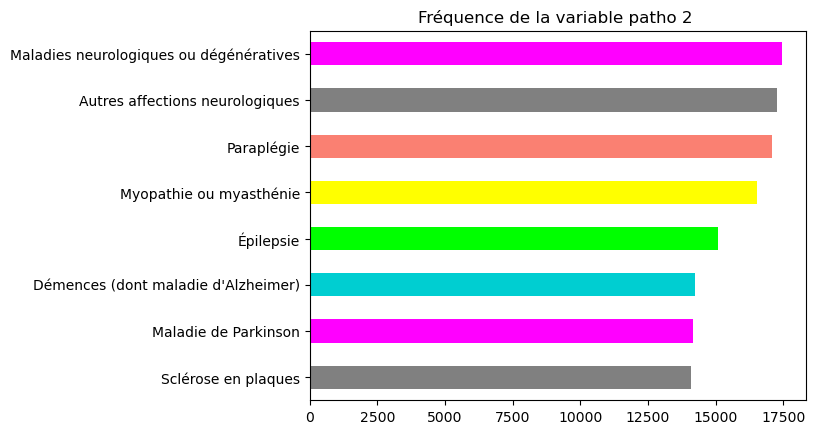

In [482]:
patho2_counts = data_maladie_neuro['patho_niv2'].value_counts().sort_values()
patho2_counts.plot(kind="barh", title="Fréquence de la variable patho 2 ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

<Axes: title={'center': 'Fréquence de la variable patho 3 '}>

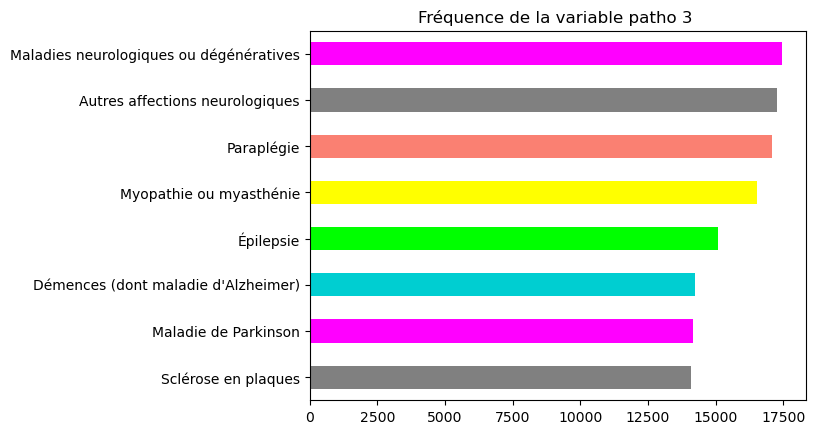

In [483]:
patho3_counts = data_maladie_neuro['patho_niv3'].value_counts().sort_values()
patho3_counts.plot(kind="barh", title="Fréquence de la variable patho 3 ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

<Axes: title={'center': 'Fréquence de la variable patho 2 '}>

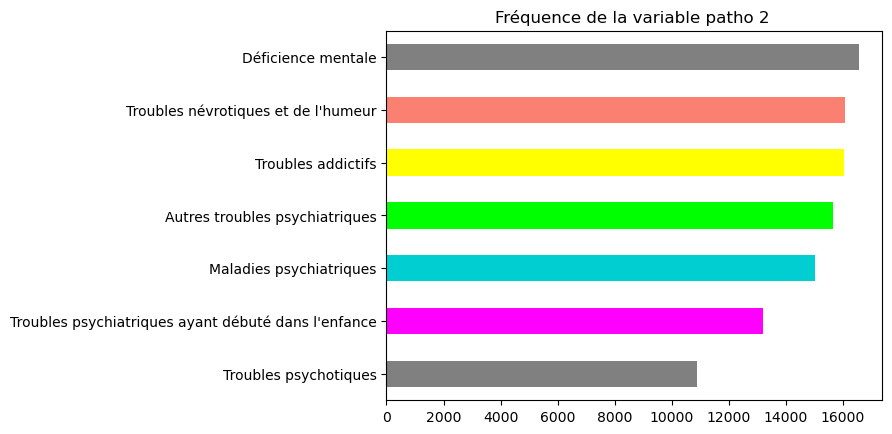

In [484]:
patho2_counts = data_maladie_psychiatrique['patho_niv2'].value_counts().sort_values()
patho2_counts.plot(kind="barh", title="Fréquence de la variable patho 2 ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

<Axes: title={'center': 'Fréquence de la variable patho 3 '}>

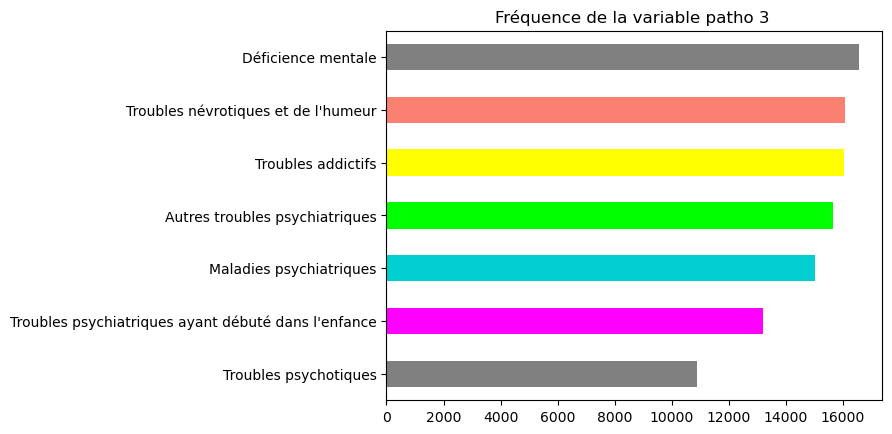

In [485]:
patho3_counts = data_maladie_psychiatrique['patho_niv3'].value_counts().sort_values()
patho3_counts.plot(kind="barh", title="Fréquence de la variable patho 3 ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

<Axes: title={'center': 'Fréquence de la variable patho 3 '}>

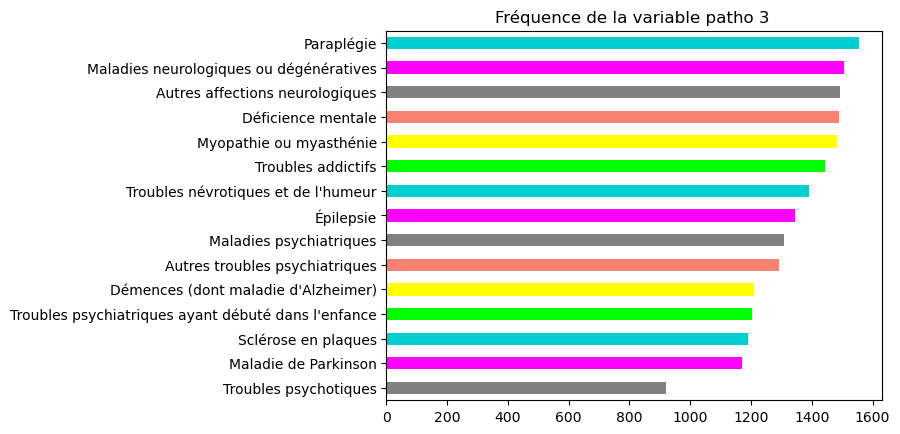

In [629]:
patho3_counts = maladie_data['patho_niv3'].value_counts().sort_values()
patho3_counts.plot(kind="barh", title="Fréquence de la variable patho 3 ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

<Axes: title={'center': 'Fréquence de la variable patho 3 '}>

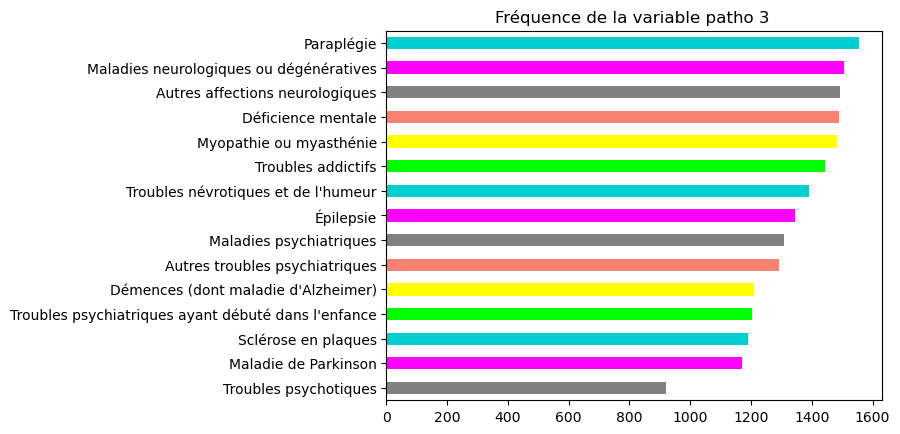

In [630]:
patho3_counts = maladie_data['patho_niv2'].value_counts().sort_values()
patho3_counts.plot(kind="barh", title="Fréquence de la variable patho 3 ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

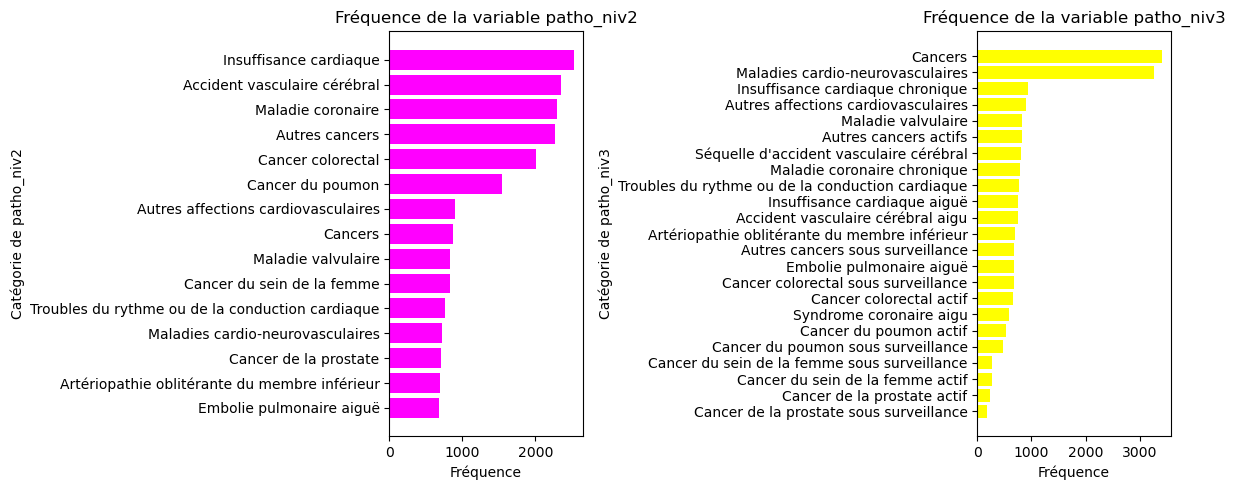

In [638]:
patho2_counts = maladie_data2['patho_niv2'].value_counts().sort_values()
patho3_counts = maladie_data2['patho_niv3'].value_counts().sort_values()

# Créez une figure avec deux sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Tracé du premier sous-graphique pour patho_niv3
ax1.barh(patho2_counts.index, patho2_counts.values, color='magenta')
ax1.set_title("Fréquence de la variable patho_niv2")
ax1.set_xlabel("Fréquence")
ax1.set_ylabel("Catégorie de patho_niv2")

# Tracé du deuxième sous-graphique pour patho_niv2
ax2.barh(patho3_counts.index, patho3_counts.values, color='yellow')
ax2.set_title("Fréquence de la variable patho_niv3")
ax2.set_xlabel("Fréquence")
ax2.set_ylabel("Catégorie de patho_niv3")

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez le graphique
plt.show()

<Axes: title={'center': "Fréquence des tranches d'âges "}>

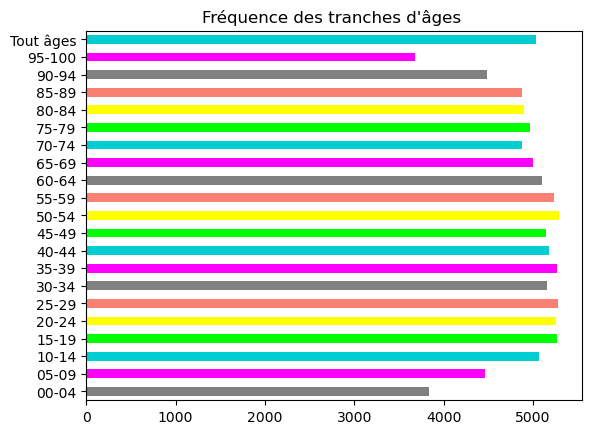

In [486]:
data_maladie_psychiatrique['cla_age_5'] = data_maladie_psychiatrique['cla_age_5'].replace('oct-14', '10-14')
data_maladie_psychiatrique['cla_age_5'] = data_maladie_psychiatrique['cla_age_5'].replace('05-sept', '05-09')
data_maladie_psychiatrique['cla_age_5'] = data_maladie_psychiatrique['cla_age_5'].replace('95et+', '95-100')
data_maladie_psychiatrique['cla_age_5'] = data_maladie_psychiatrique['cla_age_5'].replace('tsage', 'Tout âges')

cla_age_5_counts = data_maladie_psychiatrique['cla_age_5'].value_counts().sort_index()
cla_age_5_counts.plot(kind="barh", title="Fréquence des tranches d'âges ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

<Axes: title={'center': "Fréquence des tranches d'âges "}>

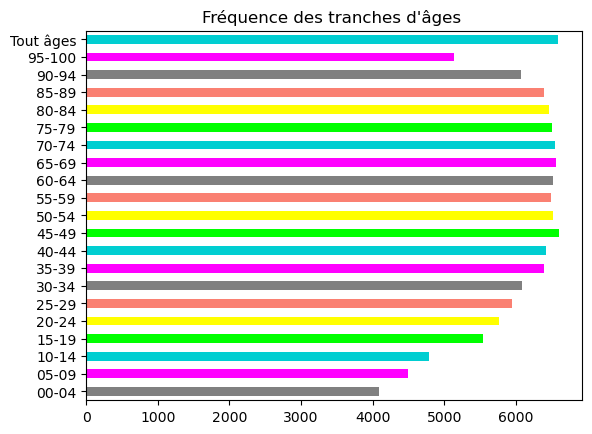

In [487]:
data_maladie_neuro['cla_age_5'] = data_maladie_neuro['cla_age_5'].replace('oct-14', '10-14')
data_maladie_neuro['cla_age_5'] = data_maladie_neuro['cla_age_5'].replace('05-sept', '05-09')
data_maladie_neuro['cla_age_5'] = data_maladie_neuro['cla_age_5'].replace('95et+', '95-100')
data_maladie_neuro['cla_age_5'] = data_maladie_neuro['cla_age_5'].replace('tsage', 'Tout âges')

cla_age_5_counts = data_maladie_neuro['cla_age_5'].value_counts().sort_index()
cla_age_5_counts.plot(kind="barh", title="Fréquence des tranches d'âges ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

In [488]:
maladie_data = pd.concat([data_maladie_neuro, data_maladie_psychiatrique], ignore_index=True)
maladie_data.head()

,annee,patho_niv1,patho_niv2,patho_niv3,cla_age_5,sexe,region,dept,ntop,npop,prev
0,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,00-04,1,27,89,20.0,8210,0.183
1,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,00-04,1,28,14,40.0,17270,0.255
2,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,00-04,1,28,50,20.0,11430,0.140
3,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,00-04,1,28,76,90.0,35750,0.257
4,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,00-04,1,32,80,50.0,15160,0.350


In [489]:
maladie_data2 = pd.concat([data_cardio, data_cancers], ignore_index=True)
maladie_data2.head

<bound method NDFrame.head of         annee                        patho_niv1              patho_niv2  \
0        2016  Maladies cardio-neurovasculaires  Insuffisance cardiaque   
1        2016  Maladies cardio-neurovasculaires  Insuffisance cardiaque   
2        2016  Maladies cardio-neurovasculaires  Insuffisance cardiaque   
3        2016  Maladies cardio-neurovasculaires  Insuffisance cardiaque   
4        2016  Maladies cardio-neurovasculaires  Insuffisance cardiaque   
...       ...                               ...                     ...   
370440   2019                           Cancers                 Cancers   
370441   2019                           Cancers                 Cancers   
370442   2019                           Cancers                 Cancers   
370443   2019                           Cancers                 Cancers   
370444   2019                           Cancers                 Cancers   

                              patho_niv3 cla_age_5  sexe  region dept

In [490]:
maladie_data2['cla_age_5'] = maladie_data2['cla_age_5'].replace('oct-14', '10-14')
maladie_data2['cla_age_5'] = maladie_data2['cla_age_5'].replace('05-sept', '05-09')
maladie_data2['cla_age_5'] = maladie_data2['cla_age_5'].replace('95et+', '95-100')
maladie_data2['cla_age_5'] = maladie_data2['cla_age_5'].replace('tsage', 'Tout âges')

In [491]:
effectif_patho_niv1 = maladie_data2['patho_niv1'].value_counts()
print(effectif_patho_niv1)

Maladies cardio-neurovasculaires    213031
Cancers                             157414
Name: patho_niv1, dtype: int64


In [492]:
effectif_patho_niv1 = maladie_data['patho_niv1'].value_counts()
print(effectif_patho_niv1)

Maladies neurologiques ou dégénératives    125906
Maladies psychiatriques                    103364
Name: patho_niv1, dtype: int64


### Ages

<Axes: title={'center': "Fréquence des tranches d'âges "}>

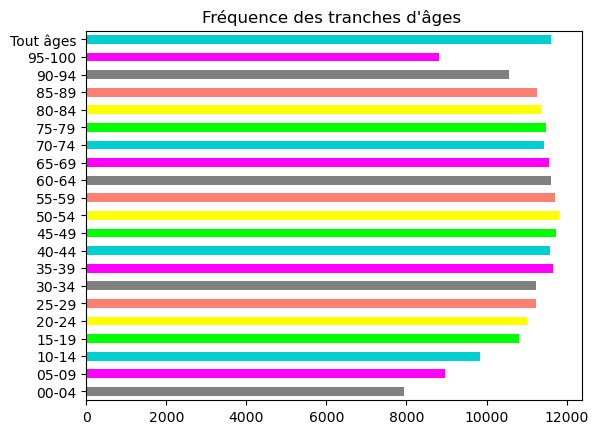

In [493]:
cla_age_5_counts = maladie_data['cla_age_5'].value_counts().sort_index()
cla_age_5_counts.plot(kind="barh", title="Fréquence des tranches d'âges ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

<Axes: title={'center': "Fréquence des tranches d'âges "}>

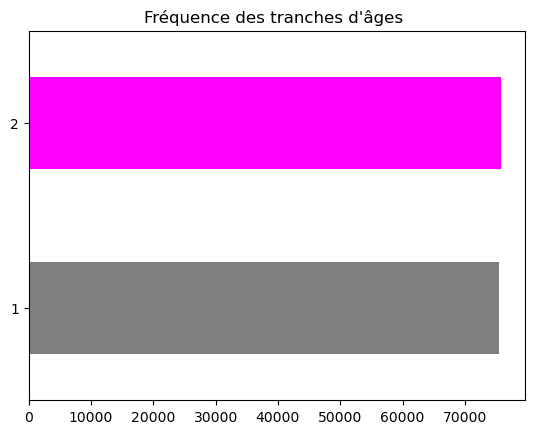

In [494]:
maladie_data = maladie_data[maladie_data['sexe'] != 9]
sex_counts = maladie_data['sexe'].value_counts().sort_index()
sex_counts.plot(kind="barh", title="Fréquence des tranches d'âges ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

<Axes: title={'center': 'Fréquence Maladie_data patho niv 3 '}>

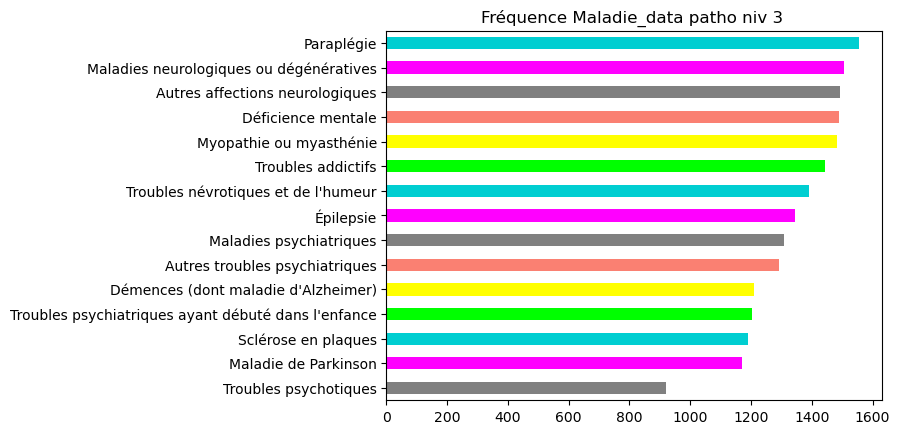

In [604]:
patho3_counts = maladie_data['patho_niv3'].value_counts().sort_values()
patho3_counts.plot(kind="barh", title="Fréquence Maladie_data patho niv 3 ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

<Axes: title={'center': 'Fréquence Maladie_data2 patho niv 3 '}>

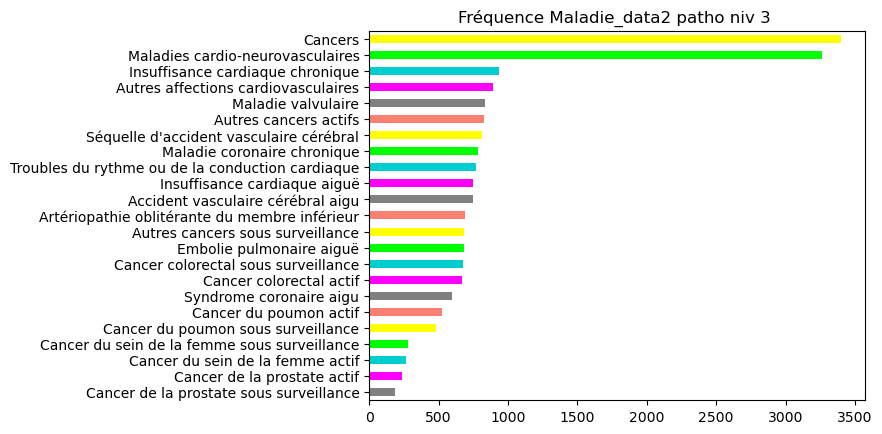

In [605]:
patho3_counts = maladie_data2['patho_niv3'].value_counts().sort_values()
patho3_counts.plot(kind="barh", title="Fréquence Maladie_data2 patho niv 3 ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

<Axes: title={'center': "Fréquence des tranches d'âges "}>

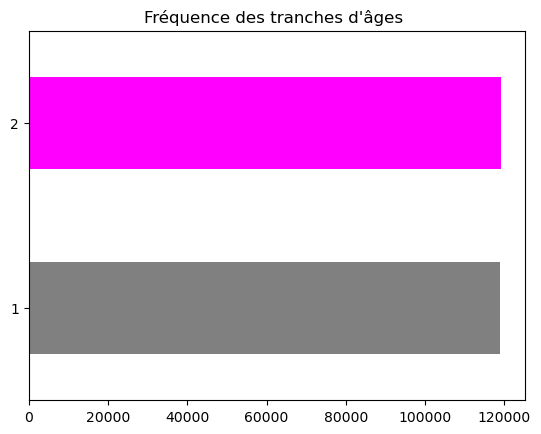

In [495]:
maladie_data2 = maladie_data2[maladie_data2['sexe'] != 9]
sex_counts = maladie_data2['sexe'].value_counts().sort_index()
sex_counts.plot(kind="barh", title="Fréquence des tranches d'âges ", color=['grey', 'magenta', 'darkturquoise','lime','yellow','salmon'] )

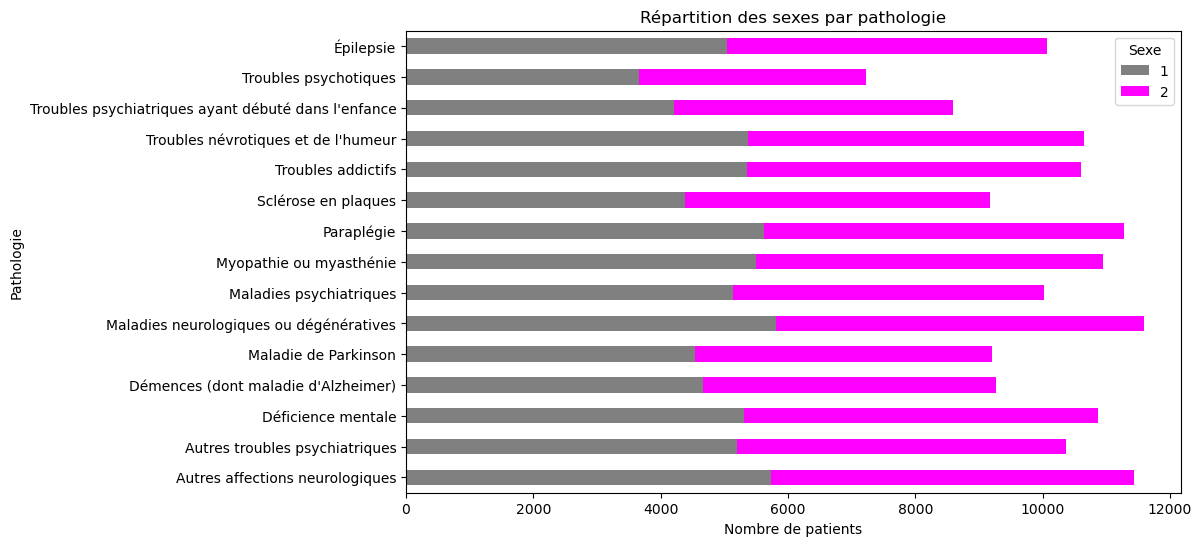

In [496]:
grouped = maladie_data.groupby('patho_niv3')['sexe'].value_counts().unstack()

ax = grouped.plot(kind='barh', stacked=True, color=['grey', 'magenta','darkturquoise'], figsize=(10, 6))

plt.xlabel('Nombre de patients')
plt.ylabel('Pathologie')
plt.title('Répartition des sexes par pathologie')

plt.legend(title='Sexe')
plt.show()

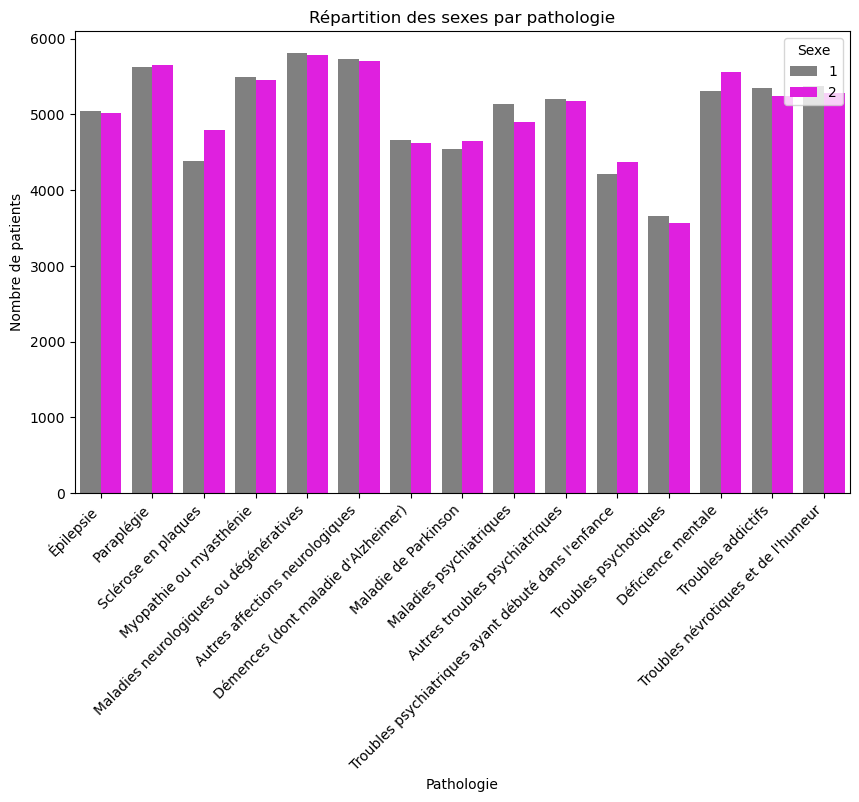

In [497]:
colors = {1: 'grey', 2: 'magenta'}

fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=maladie_data, x='patho_niv3', hue='sexe', palette=colors, ax=ax)

ax.set_xlabel('Pathologie')
ax.set_ylabel('Nombre de patients')
ax.set_title('Répartition des sexes par pathologie')
ax.legend(title='Sexe', loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.show()

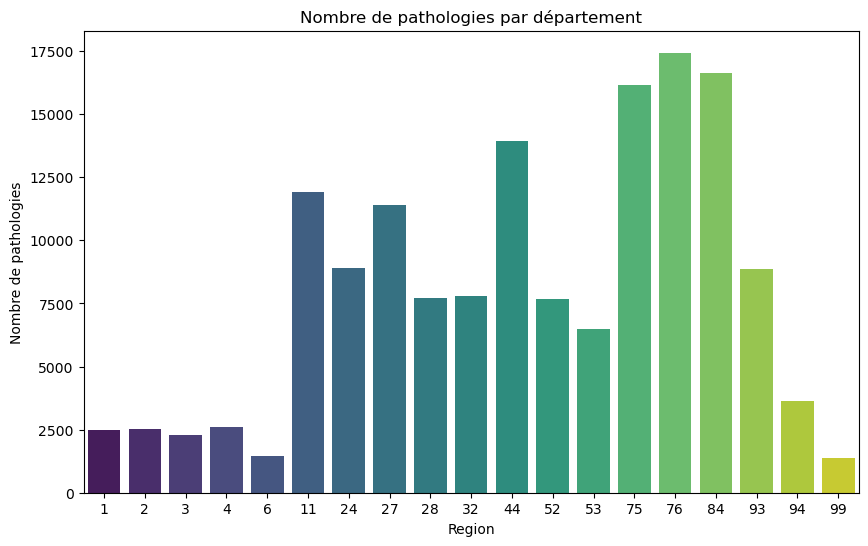

In [498]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=maladie_data, x='region', palette='viridis', ax=ax)

ax.set_xlabel('Region')
ax.set_ylabel('Nombre de pathologies')
ax.set_title('Nombre de pathologies par département')

plt.show()

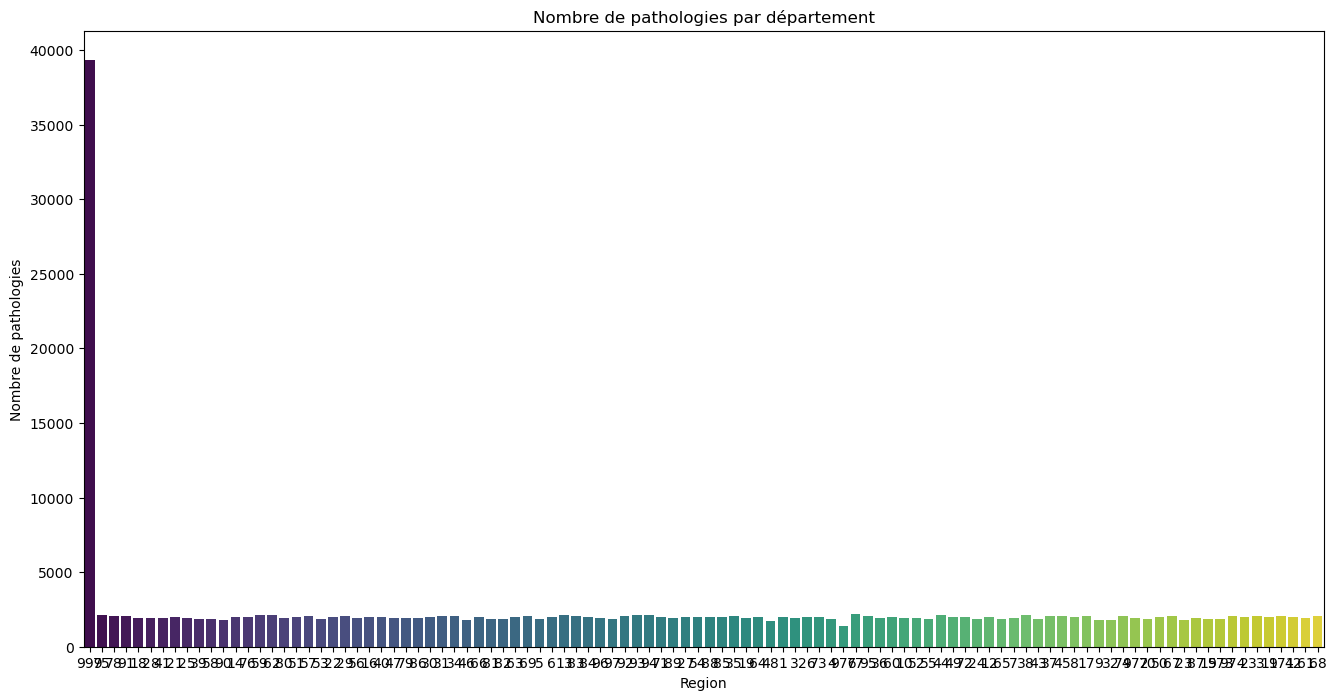

In [499]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.countplot(data=maladie_data2, x='dept', palette='viridis', ax=ax)

ax.set_xlabel('Region')
ax.set_ylabel('Nombre de pathologies')
ax.set_title('Nombre de pathologies par département')

plt.show()

In [500]:
data['dept'].value_counts()

999    170860
59       9331
77       9288
13       9229
62       9204
        ...  
90       8071
23       8045
46       8026
48       7813
976      6301
Name: dept, Length: 102, dtype: int64

In [501]:
maladie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151277 entries, 0 to 229251
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   annee       151277 non-null  int64  
 1   patho_niv1  151277 non-null  object 
 2   patho_niv2  151277 non-null  object 
 3   patho_niv3  151277 non-null  object 
 4   cla_age_5   151277 non-null  object 
 5   sexe        151277 non-null  int64  
 6   region      151277 non-null  int64  
 7   dept        151277 non-null  object 
 8   ntop        151277 non-null  float64
 9   npop        151277 non-null  int64  
 10  prev        151277 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 13.8+ MB


In [502]:
maladie_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237912 entries, 0 to 370426
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   annee       237912 non-null  int64  
 1   patho_niv1  237912 non-null  object 
 2   patho_niv2  237912 non-null  object 
 3   patho_niv3  237912 non-null  object 
 4   cla_age_5   237912 non-null  object 
 5   sexe        237912 non-null  int64  
 6   region      237912 non-null  int64  
 7   dept        237912 non-null  object 
 8   ntop        237912 non-null  float64
 9   npop        237912 non-null  int64  
 10  prev        237912 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 21.8+ MB


### Preprocessing Age

In [503]:
age_group_counts = maladie_data['cla_age_5'].value_counts()

# Affichage des résultats
print(age_group_counts)

50-54        7850
Tout âges    7839
45-49        7799
55-59        7772
35-39        7736
40-44        7715
60-64        7673
65-69        7646
75-79        7643
70-74        7540
30-34        7492
80-84        7491
85-89        7412
25-29        7370
20-24        7256
15-19        7100
90-94        6860
10-14        6455
05-09        5833
95-100       5664
00-04        5131
Name: cla_age_5, dtype: int64


In [504]:
maladie_data = maladie_data[maladie_data['cla_age_5'] != 'Tout âges']
effectif_patho_niv1 = maladie_data['cla_age_5'].value_counts()
print(effectif_patho_niv1)

50-54     7850
45-49     7799
55-59     7772
35-39     7736
40-44     7715
60-64     7673
65-69     7646
75-79     7643
70-74     7540
30-34     7492
80-84     7491
85-89     7412
25-29     7370
20-24     7256
15-19     7100
90-94     6860
10-14     6455
05-09     5833
95-100    5664
00-04     5131
Name: cla_age_5, dtype: int64


In [505]:
maladie_data2 = maladie_data2[maladie_data2['cla_age_5'] != 'Tout âges']
effectif_patho2_niv1 = maladie_data2['cla_age_5'].value_counts()
print(effectif_patho2_niv1)

55-59     12947
85-89     12903
90-94     12903
50-54     12903
70-74     12881
80-84     12853
65-69     12827
75-79     12805
60-64     12786
45-49     12756
40-44     12348
95-100    12171
35-39     11629
30-34     11307
25-29     10382
20-24      9512
15-19      8290
10-14      7061
00-04      7004
05-09      6762
Name: cla_age_5, dtype: int64


In [506]:
age_group_mapping = {
    (0, 4): 'Enfants',  
    (5, 9): 'Enfants', 
    (10, 14): 'Ados',
    (15, 19): 'Ados',
    (20, 24): 'Jeunes Adultes',
    (25, 29): 'Jeunes Adultes',
    (30, 34): 'Jeunes Adultes',
    (35, 39): 'Adultes',
    (40, 44): 'Adultes',
    (45, 49): 'Adultes',
    (45, 49): 'Adultes',
    (50, 54): 'Adultes',
    (55, 59): 'Adultes',
    (60, 64): 'Seniors',
    (65, 69): 'Seniors',
    (70, 74): 'Seniors',
    (75, 79): 'Seniors',
    (80, 84): 'Personnes agées',
    (85, 89): 'Personnes agées',
    (90, 94): 'Personnes agées',
}

def extract_age_from_range(age_range):
    # Supprimez les espaces et divisez la chaîne par le tiret ("-")
    age_parts = age_range.replace(' ', '').split('-')
    # Prenez la première valeur de la liste comme âge
    return int(age_parts[0])

# Convertissez la colonne 'cla_age_5' en valeurs numériques en utilisant la fonction extract_age_from_range
maladie_data['cla_age_5'] = maladie_data['cla_age_5'].apply(extract_age_from_range)

# Définissez une fonction pour mapper les âges aux labels
def map_age_to_label(age):
    for (min_age, max_age), label in age_group_mapping.items():
        if min_age <= age <= max_age:
            return label
    return 'Inconnu'


# Appliquez la fonction pour créer la colonne 'age_group'
maladie_data['age_group'] = maladie_data['cla_age_5'].apply(map_age_to_label)
print(maladie_data[['age_group']])


       age_group
0        Enfants
1        Enfants
2        Enfants
3        Enfants
4        Enfants
...          ...
229247   Seniors
229248   Seniors
229249   Seniors
229250   Seniors
229251   Seniors

[143438 rows x 1 columns]


In [507]:
age_group_mapping = {
    (0, 4): 'Enfants',  
    (5, 9): 'Enfants', 
    (10, 14): 'Ados',
    (15, 19): 'Ados',
    (20, 24): 'Jeunes Adultes',
    (25, 29): 'Jeunes Adultes',
    (30, 34): 'Jeunes Adultes',
    (35, 39): 'Adultes',
    (40, 44): 'Adultes',
    (45, 49): 'Adultes',
    (45, 49): 'Adultes',
    (50, 54): 'Adultes',
    (55, 59): 'Adultes',
    (60, 64): 'Seniors',
    (65, 69): 'Seniors',
    (70, 74): 'Seniors',
    (75, 79): 'Seniors',
    (80, 84): 'Personnes agées',
    (85, 89): 'Personnes agées',
    (90, 94): 'Personnes agées',
}

def extract_age_from_range(age_range):
    # Supprimez les espaces et divisez la chaîne par le tiret ("-")
    age_parts = age_range.replace(' ', '').split('-')
    # Prenez la première valeur de la liste comme âge
    return int(age_parts[0])

# Convertissez la colonne 'cla_age_5' en valeurs numériques en utilisant la fonction extract_age_from_range
maladie_data2['cla_age_5'] = maladie_data2['cla_age_5'].apply(extract_age_from_range)

# Définissez une fonction pour mapper les âges aux labels
def map_age_to_label(age):
    for (min_age, max_age), label in age_group_mapping.items():
        if min_age <= age <= max_age:
            return label
    return 'Inconnu'


# Appliquez la fonction pour créer la colonne 'age_group'
maladie_data2['age_group'] = maladie_data2['cla_age_5'].apply(map_age_to_label)
print(maladie_data2[['age_group']])

              age_group
0       Personnes agées
1       Personnes agées
2       Personnes agées
3       Personnes agées
4       Personnes agées
...                 ...
370422   Jeunes Adultes
370423   Jeunes Adultes
370424   Jeunes Adultes
370425   Jeunes Adultes
370426   Jeunes Adultes

[225030 rows x 1 columns]


In [508]:
maladie_data2 = maladie_data2[maladie_data2['age_group'] != 'Inconnu']
maladie_data2 = maladie_data2.drop(columns=["cla_age_5","region"])

In [509]:
maladie_data = maladie_data[maladie_data['age_group'] != 'Inconnu']
maladie_data = maladie_data.drop(columns=["cla_age_5","region"])
df=maladie_data

In [510]:
maladie_data.head()

,annee,patho_niv1,patho_niv2,patho_niv3,sexe,dept,ntop,npop,prev,age_group
0,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,1,89,20.0,8210,0.183,Enfants
1,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,1,14,40.0,17270,0.255,Enfants
2,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,1,50,20.0,11430,0.140,Enfants
3,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,1,76,90.0,35750,0.257,Enfants
4,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,1,80,50.0,15160,0.350,Enfants


In [511]:
maladie_data2.head()

,annee,patho_niv1,patho_niv2,patho_niv3,sexe,dept,ntop,npop,prev,age_group
0,2016,Maladies cardio-neurovasculaires,Insuffisance cardiaque,Insuffisance cardiaque chronique,2,999,250.0,6140,4.021,Personnes agées
1,2016,Maladies cardio-neurovasculaires,Insuffisance cardiaque,Insuffisance cardiaque chronique,2,999,450.0,7380,6.138,Personnes agées
2,2016,Maladies cardio-neurovasculaires,Insuffisance cardiaque,Insuffisance cardiaque chronique,2,75,1270.0,30830,4.125,Personnes agées
3,2016,Maladies cardio-neurovasculaires,Insuffisance cardiaque,Insuffisance cardiaque chronique,2,78,820.0,19130,4.281,Personnes agées
4,2016,Maladies cardio-neurovasculaires,Insuffisance cardiaque,Insuffisance cardiaque chronique,2,91,690.0,16330,4.224,Personnes agées


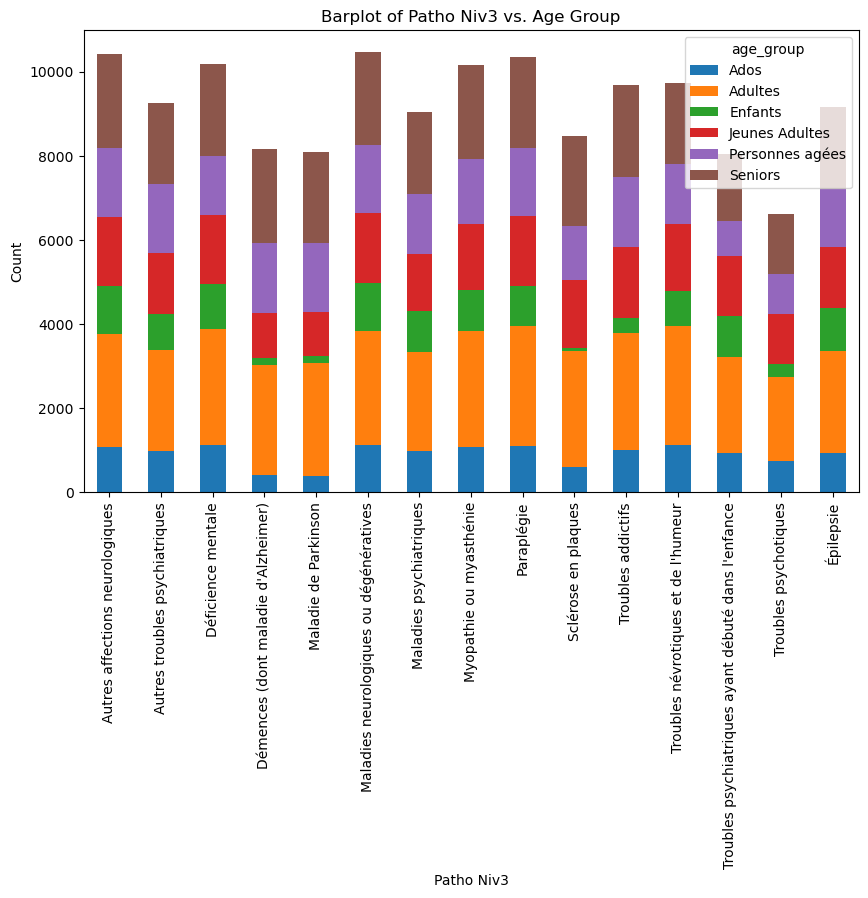

In [398]:
grouped_data = maladie_data.groupby(['age_group', 'patho_niv3']).size().unstack().fillna(0)

# Transposez le DataFrame pour avoir les maladies sur l'axe des x
grouped_data = grouped_data.T

# Créez un graphique à barres
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajoutez des étiquettes et un titre
plt.xlabel('Patho Niv3')
plt.ylabel('Count')
plt.title('Barplot of Patho Niv3 vs. Age Group')

# Affichez le graphique
plt.show()

In [399]:
missing_values=maladie_data.isnull().sum()
missing_values.sort_values(ascending=False)
print(missing_values)

annee         0
patho_niv1    0
patho_niv2    0
patho_niv3    0
sexe          0
region        0
ntop          0
npop          0
prev          0
age_group     0
dtype: int64


## Encodement

In [512]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
enc2 = OneHotEncoder(handle_unknown='ignore')
enc2.fit(maladie_data2.loc[:,['age_group']])

OneHotEncoder(handle_unknown='ignore')

In [513]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(maladie_data.loc[:,['age_group']])

OneHotEncoder(handle_unknown='ignore')

In [514]:
enc2.categories_

[array(['Ados', 'Adultes', 'Enfants', 'Jeunes Adultes', 'Personnes agées',
        'Seniors'], dtype=object)]

In [515]:
enc.categories_

[array(['Ados', 'Adultes', 'Enfants', 'Jeunes Adultes', 'Personnes agées',
        'Seniors'], dtype=object)]

In [516]:
encoded_features2 = enc2.transform(maladie_data2.loc[:,['age_group']]).toarray()
encoded_features2

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [517]:
encoded_features = enc.transform(maladie_data.loc[:,['age_group']]).toarray()
encoded_features

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [518]:
encoded_features_names2 = enc2.get_feature_names_out()
encoded_features_names2

array(['age_group_Ados', 'age_group_Adultes', 'age_group_Enfants',
       'age_group_Jeunes Adultes', 'age_group_Personnes agées',
       'age_group_Seniors'], dtype=object)

In [519]:
encoded_features_names = enc.get_feature_names_out()
encoded_features_names

array(['age_group_Ados', 'age_group_Adultes', 'age_group_Enfants',
       'age_group_Jeunes Adultes', 'age_group_Personnes agées',
       'age_group_Seniors'], dtype=object)

In [520]:
enc_name2=pd.DataFrame(encoded_features2,columns = encoded_features_names2)

In [521]:
enc_name=pd.DataFrame(encoded_features,columns = encoded_features_names)

In [522]:
enco2 = pd.DataFrame(enc_name2, columns=['age_group_Ados', 'age_group_Adultes', 'age_group_Enfants',
       'age_group_Jeunes Adultes', 'age_group_Personnes agées',
       'age_group_Seniors'])



enco2.index = maladie_data2.index
maladie_data2 = pd.concat([maladie_data2, enco2], axis=1)

maladie_data2.head()

,annee,patho_niv1,patho_niv2,patho_niv3,sexe,dept,ntop,npop,prev,age_group,age_group_Ados,age_group_Adultes,age_group_Enfants,age_group_Jeunes Adultes,age_group_Personnes agées,age_group_Seniors
0,2016,Maladies cardio-neurovasculaires,Insuffisance cardiaque,Insuffisance cardiaque chronique,2,999,250.0,6140,4.021,Personnes agées,0.0,0.0,0.0,0.0,1.0,0.0
1,2016,Maladies cardio-neurovasculaires,Insuffisance cardiaque,Insuffisance cardiaque chronique,2,999,450.0,7380,6.138,Personnes agées,0.0,0.0,0.0,0.0,1.0,0.0
2,2016,Maladies cardio-neurovasculaires,Insuffisance cardiaque,Insuffisance cardiaque chronique,2,75,1270.0,30830,4.125,Personnes agées,0.0,0.0,0.0,0.0,1.0,0.0
3,2016,Maladies cardio-neurovasculaires,Insuffisance cardiaque,Insuffisance cardiaque chronique,2,78,820.0,19130,4.281,Personnes agées,0.0,0.0,0.0,0.0,1.0,0.0
4,2016,Maladies cardio-neurovasculaires,Insuffisance cardiaque,Insuffisance cardiaque chronique,2,91,690.0,16330,4.224,Personnes agées,0.0,0.0,0.0,0.0,1.0,0.0


In [523]:
enco = pd.DataFrame(enc_name, columns=['age_group_Ados', 'age_group_Adultes', 'age_group_Enfants',
       'age_group_Jeunes Adultes', 'age_group_Personnes agées',
       'age_group_Seniors'])



enco.index = maladie_data.index
maladie_data = pd.concat([maladie_data, enco], axis=1)

maladie_data.head()

,annee,patho_niv1,patho_niv2,patho_niv3,sexe,dept,ntop,npop,prev,age_group,age_group_Ados,age_group_Adultes,age_group_Enfants,age_group_Jeunes Adultes,age_group_Personnes agées,age_group_Seniors
0,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,1,89,20.0,8210,0.183,Enfants,0.0,0.0,1.0,0.0,0.0,0.0
1,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,1,14,40.0,17270,0.255,Enfants,0.0,0.0,1.0,0.0,0.0,0.0
2,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,1,50,20.0,11430,0.140,Enfants,0.0,0.0,1.0,0.0,0.0,0.0
3,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,1,76,90.0,35750,0.257,Enfants,0.0,0.0,1.0,0.0,0.0,0.0
4,2019,Maladies neurologiques ou dégénératives,Épilepsie,Épilepsie,1,80,50.0,15160,0.350,Enfants,0.0,0.0,1.0,0.0,0.0,0.0


In [524]:
maladie_data.shape

(137774, 16)

In [525]:
maladie_data2=maladie_data2.drop(columns=['age_group'])

In [526]:
maladie_data=maladie_data.drop(columns=['age_group'])

In [609]:
maladie_data.shape

(20000, 15)

## données split

In [527]:
maladie_data = maladie_data.sample(n=20000, random_state=42)
maladie_data.reset_index(drop=True, inplace=True)

In [624]:
X=maladie_data.drop(columns=["patho_niv1","patho_niv2","patho_niv3"])
y=maladie_data["patho_niv3"]

patho=maladie_data[["patho_niv1","patho_niv2","patho_niv3"]]

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [529]:
X_train.head()

,annee,sexe,dept,ntop,npop,prev,age_group_Ados,age_group_Adultes,age_group_Enfants,age_group_Jeunes Adultes,age_group_Personnes agées,age_group_Seniors
5894,2019,2,27,230.0,18530,1.257,0.0,0.0,0.0,0.0,0.0,1.0
3728,2020,1,76,1340.0,31600,4.234,0.0,0.0,0.0,0.0,0.0,1.0
8958,2016,2,22,180.0,16520,0.865,0.0,0.0,1.0,0.0,0.0,0.0
7671,2020,1,26,90.0,12640,0.356,0.0,0.0,0.0,1.0,0.0,0.0
5999,2019,1,999,60.0,4720,1.335,0.0,0.0,0.0,1.0,0.0,0.0


In [530]:
maladie_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212859 entries, 0 to 370426
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   annee                      212859 non-null  int64  
 1   patho_niv1                 212859 non-null  object 
 2   patho_niv2                 212859 non-null  object 
 3   patho_niv3                 212859 non-null  object 
 4   sexe                       212859 non-null  int64  
 5   dept                       212859 non-null  object 
 6   ntop                       212859 non-null  float64
 7   npop                       212859 non-null  int64  
 8   prev                       212859 non-null  float64
 9   age_group_Ados             212859 non-null  float64
 10  age_group_Adultes          212859 non-null  float64
 11  age_group_Enfants          212859 non-null  float64
 12  age_group_Jeunes Adultes   212859 non-null  float64
 13  age_group_Personnes agées  21

In [531]:
maladie_data2 = maladie_data2.sample(n=20000, random_state=42)
maladie_data2.reset_index(drop=True, inplace=True)

In [623]:
X2=maladie_data2.drop(columns=["patho_niv1","patho_niv2","patho_niv3"])
y2=maladie_data2["patho_niv3"]

patho2=maladie_data2[["patho_niv1","patho_niv2","patho_niv3"]]

X_train2,X_test2,y_train2,y_test2= train_test_split(X2,y2, test_size=0.2, random_state=42)

In [533]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 5894 to 15795
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   annee                      16000 non-null  int64  
 1   sexe                       16000 non-null  int64  
 2   dept                       16000 non-null  object 
 3   ntop                       16000 non-null  float64
 4   npop                       16000 non-null  int64  
 5   prev                       16000 non-null  float64
 6   age_group_Ados             16000 non-null  float64
 7   age_group_Adultes          16000 non-null  float64
 8   age_group_Enfants          16000 non-null  float64
 9   age_group_Jeunes Adultes   16000 non-null  float64
 10  age_group_Personnes agées  16000 non-null  float64
 11  age_group_Seniors          16000 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 1.6+ MB


In [535]:
y_test2_df = pd.DataFrame(y_test2, columns=['patho_niv1'])

## Corrélation

<Axes: >

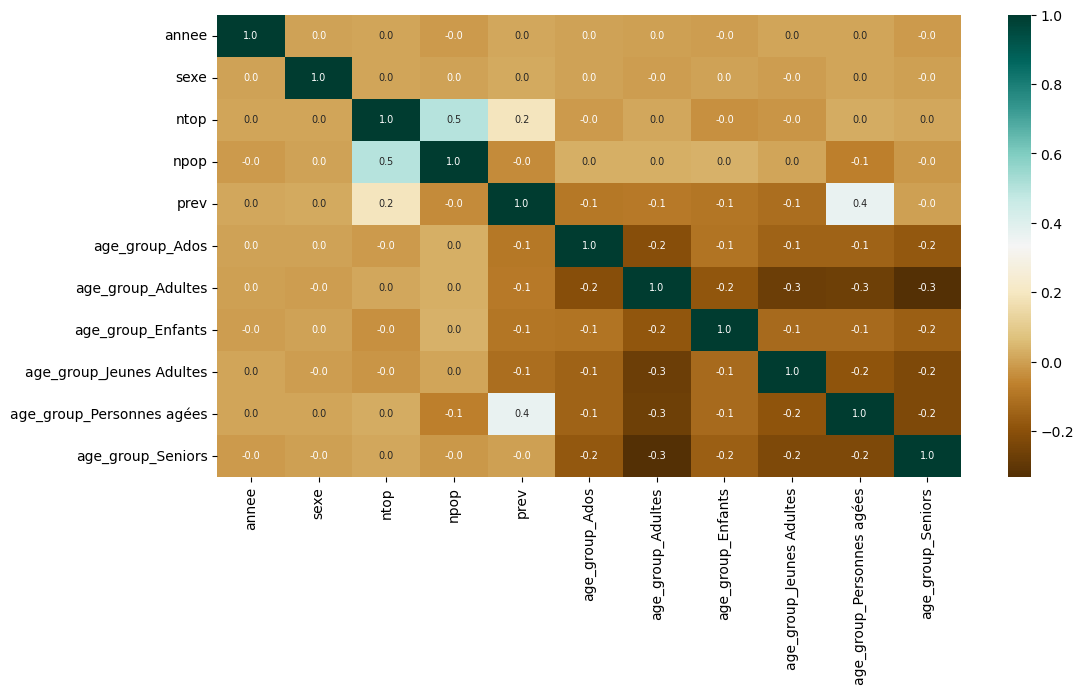

In [536]:
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 7}, cmap='BrBG', fmt='.1f')

<Axes: >

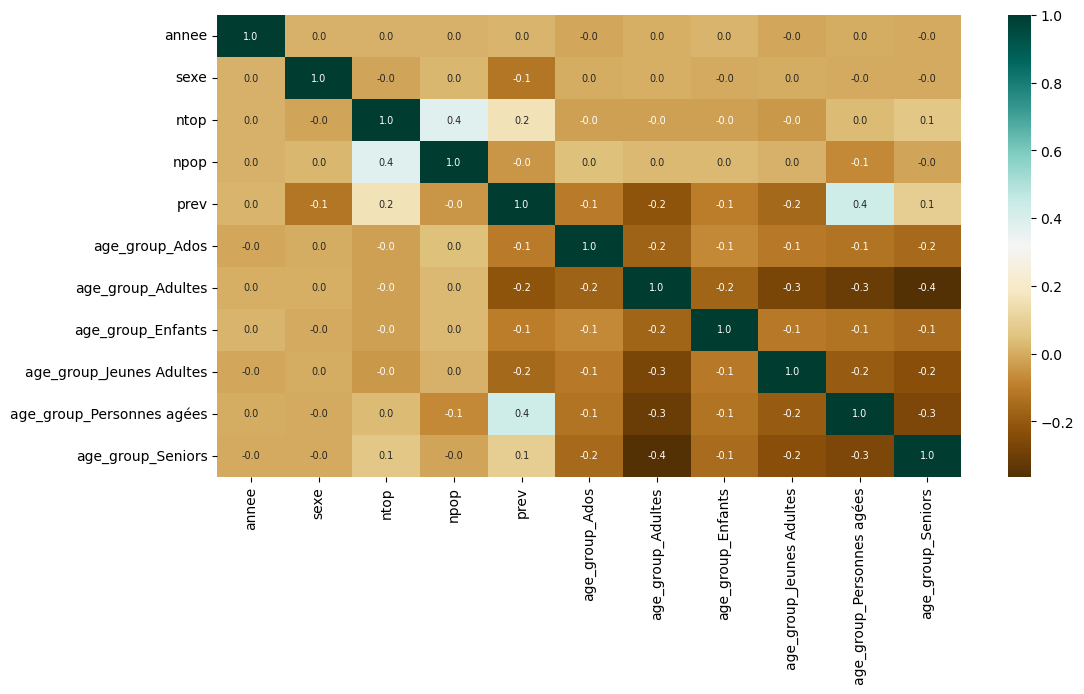

In [425]:
plt.figure(figsize=(12, 6))
sns.heatmap(X_train2.corr(), annot=True, annot_kws={"size": 7}, cmap='BrBG', fmt='.1f')

## Tests de modèles 

In [539]:
models2test = [
    LogisticRegression(max_iter=2000),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42),
    GradientBoostingClassifier()
]

In [625]:
scores_allClassifiers = pd.DataFrame([], columns=['classifier', 'metrics', 'values'])
for classifier in models2test:
    stratKFold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    accuracy_scores = cross_val_score(classifier, X_train, y_train, cv=stratKFold, scoring='accuracy')
    
    classifier_str = str(classifier).split('(')[0]
    mean_accuracy = accuracy_scores.mean()
    
    model_scores_df = pd.DataFrame({'classifier': [classifier_str],
                                    'metrics': ['accuracy'],
                                    'values': [mean_accuracy]})

    scores_allClassifiers = pd.concat([scores_allClassifiers, model_scores_df], axis=0)

In [626]:
scores_allClassifiers

,classifier,metrics,values
0,LogisticRegression,accuracy,0.118750
0,DecisionTreeClassifier,accuracy,0.323687
0,KNeighborsClassifier,accuracy,0.163625
0,RandomForestClassifier,accuracy,0.308125
0,GradientBoostingClassifier,accuracy,0.405125


## Tests Models 2

In [612]:
classifier_str = [str(c).split('(')[0] for c in models2test]
scores_allClassifiers = pd.DataFrame([], columns=['classifier', 'metrics', 'values'])

for classifier in models2test:
    stratKFold = StratifiedKFold(n_splits=10, shuffle=True, random_state=4392)
    scores = cross_validate(classifier, X_train, y_train, cv=stratKFold,
                            scoring=('accuracy', 'roc_auc'),
                            return_train_score=True, return_estimator=False)

    classifier_str = str(classifier).split('(')[0]

    scores_allClassifiers = pd.concat([scores_allClassifiers,
                                       pd.DataFrame([[classifier_str, 'accuracy', scores['test_accuracy'].mean()]],
                                                    columns=['classifier', 'metrics', 'values'])],
                                      axis=0)
    scores_allClassifiers = pd.concat([scores_allClassifiers,
                                       pd.DataFrame([[classifier_str, 'roc_auc', scores['test_roc_auc'].mean()]],
                                                    columns=['classifier', 'metrics', 'values'])],
                                      axis=0)

In [613]:
scores_allClassifiers

,classifier,metrics,values
0,LogisticRegression,accuracy,0.118625
0,LogisticRegression,roc_auc,NaN
0,DecisionTreeClassifier,accuracy,0.326000
0,DecisionTreeClassifier,roc_auc,NaN
0,KNeighborsClassifier,accuracy,0.161438
0,KNeighborsClassifier,roc_auc,NaN
0,RandomForestClassifier,accuracy,0.303500
0,RandomForestClassifier,roc_auc,NaN
0,GradientBoostingClassifier,accuracy,0.400938
0,GradientBoostingClassifier,roc_auc,NaN


Lorsqu'il n'y a pas beaucoup de choix le modèle fonction avec une roc à 0.85 alors qu'au plus on cherche de la précision au moins il est performant

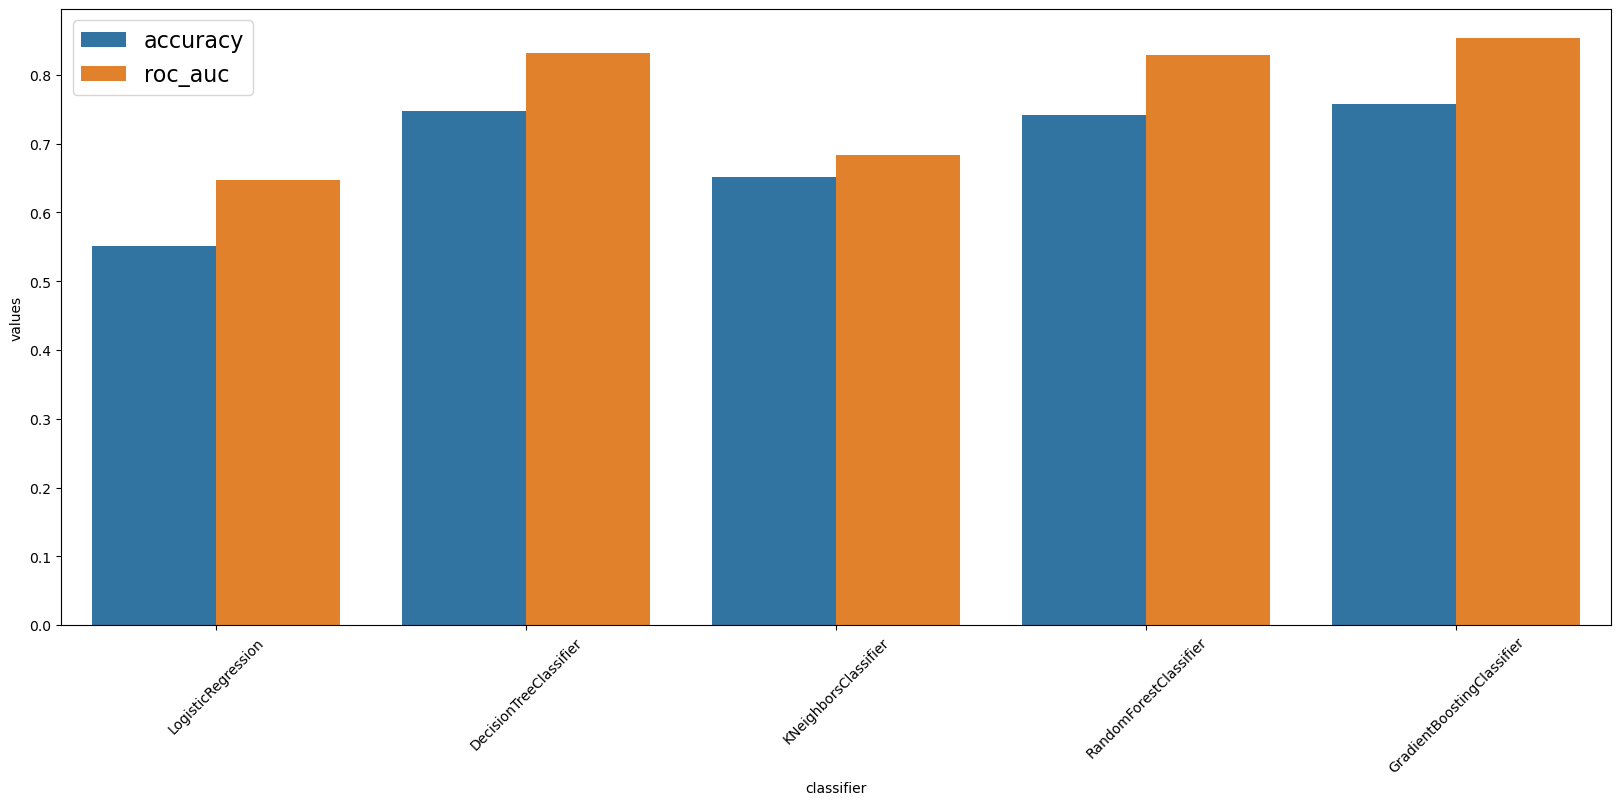

In [544]:
plt.figure(figsize=(20,8))
sns.barplot(scores_allClassifiers, x='classifier', y='values', hue='metrics')
plt.xticks(rotation=45)
plt.legend(fontsize='16')


## Maladie_data2

In [627]:
scores_allClassifiers2 = pd.DataFrame([], columns=['classifier', 'metrics', 'values'])
for classifier in models2test:
    stratKFold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    accuracy_scores = cross_val_score(classifier, X_train2, y_train2, cv=stratKFold, scoring='accuracy')
    
    classifier_str = str(classifier).split('(')[0]
    mean_accuracy = accuracy_scores.mean()
    
    model_scores_df = pd.DataFrame({'classifier': [classifier_str],
                                    'metrics': ['accuracy'],
                                    'values': [mean_accuracy]})

    scores_allClassifiers2 = pd.concat([scores_allClassifiers2, model_scores_df], axis=0)

In [628]:
scores_allClassifiers2

,classifier,metrics,values
0,LogisticRegression,accuracy,0.171375
0,DecisionTreeClassifier,accuracy,0.231375
0,KNeighborsClassifier,accuracy,0.105625
0,RandomForestClassifier,accuracy,0.221750
0,GradientBoostingClassifier,accuracy,0.285875


In [547]:
classifier_str = [str(c).split('(')[0] for c in models2test]
scores_allClassifiers = pd.DataFrame([], columns=['classifier', 'metrics', 'values'])

for classifier in models2test:
    stratKFold = StratifiedKFold(n_splits=10, shuffle=True, random_state=4392)
    scores = cross_validate(classifier, X_train2, y_train2, cv=stratKFold,
                            scoring=('accuracy', 'roc_auc'),
                            return_train_score=True, return_estimator=False)

    classifier_str = str(classifier).split('(')[0]

    scores_allClassifiers = pd.concat([scores_allClassifiers,
                                       pd.DataFrame([[classifier_str, 'accuracy', scores['test_accuracy'].mean()]],
                                                    columns=['classifier', 'metrics', 'values'])],
                                      axis=0)
    scores_allClassifiers = pd.concat([scores_allClassifiers,
                                       pd.DataFrame([[classifier_str, 'roc_auc', scores['test_roc_auc'].mean()]],
                                                    columns=['classifier', 'metrics', 'values'])],
                                      axis=0)

In [548]:
scores_allClassifiers

,classifier,metrics,values
0,LogisticRegression,accuracy,0.588250
0,LogisticRegression,roc_auc,0.499631
0,DecisionTreeClassifier,accuracy,0.702500
0,DecisionTreeClassifier,roc_auc,0.777605
0,KNeighborsClassifier,accuracy,0.544250
0,KNeighborsClassifier,roc_auc,0.525921
0,RandomForestClassifier,accuracy,0.693312
0,RandomForestClassifier,roc_auc,0.773712
0,GradientBoostingClassifier,accuracy,0.718125
0,GradientBoostingClassifier,roc_auc,0.809180


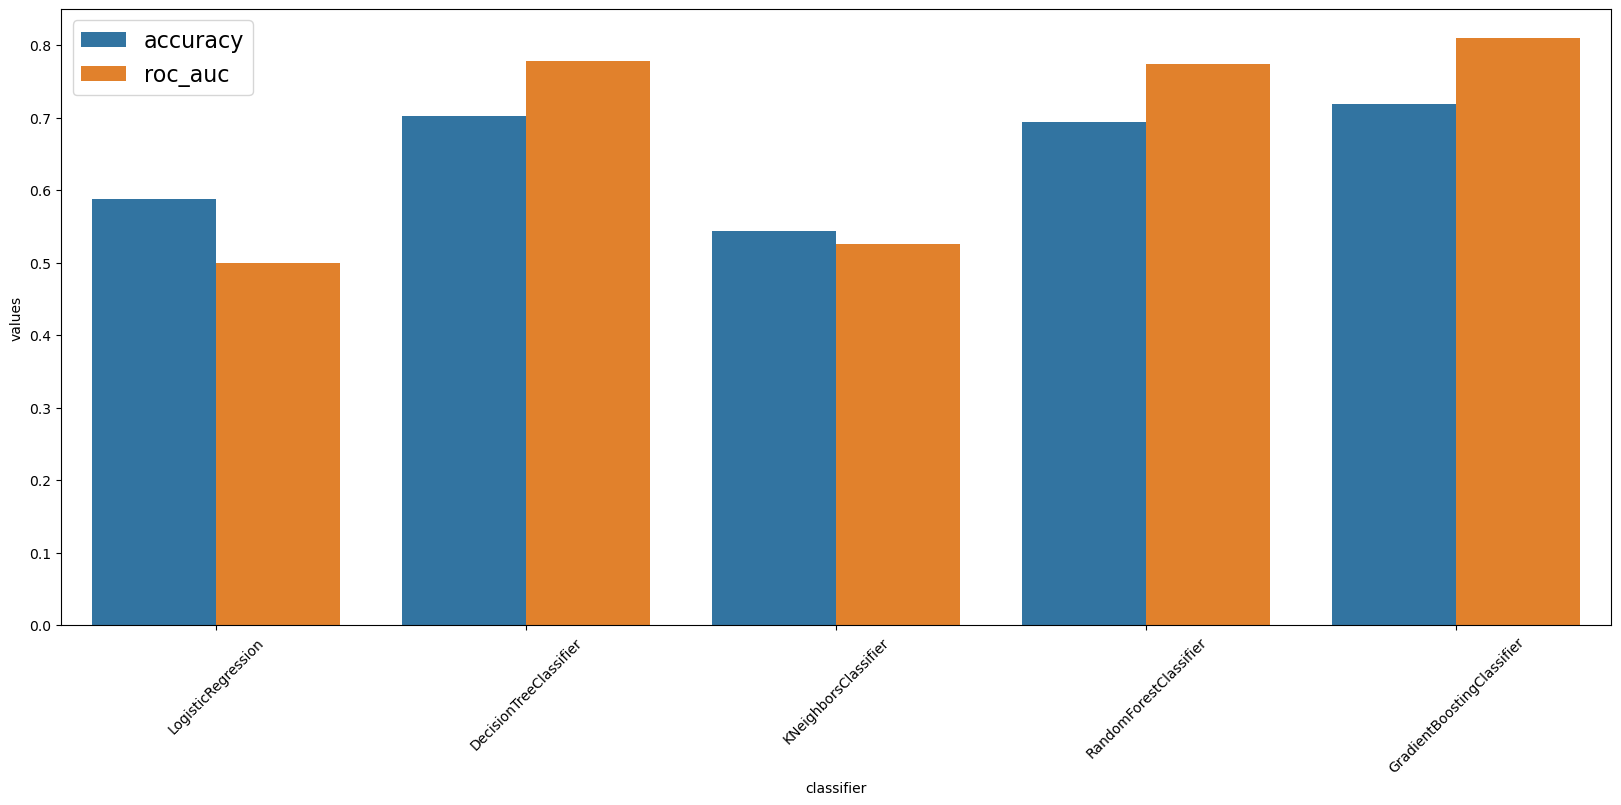

In [606]:
plt.figure(figsize=(20,8))
sns.barplot(scores_allClassifiers, x='classifier', y='values', hue='metrics')
plt.xticks(rotation=45)
plt.legend(fontsize='16')

## Autre manière 

In [549]:
clf = DecisionTreeClassifier(random_state=0)

In [550]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred = pd.DataFrame(y_pred)
accuracy_score(y_pred,y_test)

0.725

In [551]:
clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
y_pred2 = pd.DataFrame(y_pred2)
accuracy_score(y_pred2,y_test2)

0.67875

In [553]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
y_pred = pd.DataFrame(y_pred)
accuracy_score(y_pred,y_test)

0.755

In [554]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train2, y_train2)
y_pred2= rf.predict(X_test2)
y_pred2 = pd.DataFrame(y_pred2)
accuracy_score(y_pred2,y_test2)

0.71625

In [555]:
rf_score=cross_val_score(rf, pd.concat([X_train,X_test],axis=0),pd.concat([y_train,y_test],axis=0) , cv=10)
print(np.mean(rf_score))

0.7537


In [556]:
rf_score=cross_val_score(rf, pd.concat([X_train2,X_test2],axis=0),pd.concat([y_train2,y_test2],axis=0) , cv=10)
print(np.mean(rf_score))

0.7196


In [557]:
mlp = MLPClassifier(random_state=0, max_iter=300)
mlp.fit(X_train, y_train)
y_pred= mlp.predict(X_test)
y_pred = pd.DataFrame(y_pred)
accuracy_score(y_pred,y_test)

0.47625

In [563]:
mlp = MLPClassifier(random_state=0, max_iter=300)
mlp.fit(X_train2, y_train2)
y_pred2= mlp.predict(X_test2)
y_pred2 = pd.DataFrame(y_pred2)
accuracy_score(y_pred2,y_test2)

0.5175

In [594]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
y_pred= gbc.predict(X_test)
y_pred = pd.DataFrame(y_pred)
accuracy_score(y_pred,y_test)

0.7415

In [587]:
gbc2 = GradientBoostingClassifier(random_state=0)
gbc2.fit(X_train2, y_train2)
y_pred2= gbc2.predict(X_test2)
y_pred2 = pd.DataFrame(y_pred2)
accuracy_score(y_pred2,y_test2)

0.7115

## Matrice de confusion

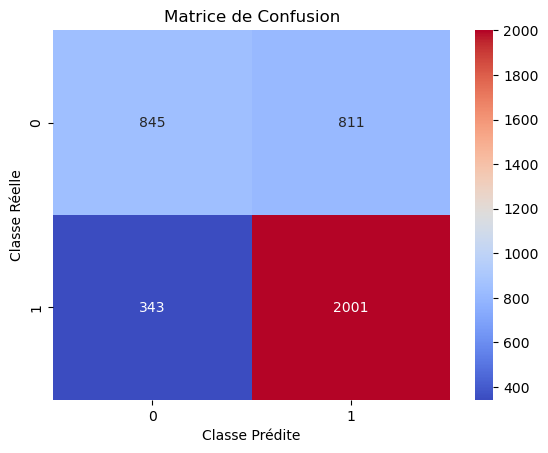

In [608]:
confusion = confusion_matrix(y_test2, y_pred2)

sns.heatmap(confusion, annot=True, fmt='d', cmap='coolwarm')

plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.title('Matrice de Confusion')
plt.show()

[[1746  450]
 [ 584 1220]]


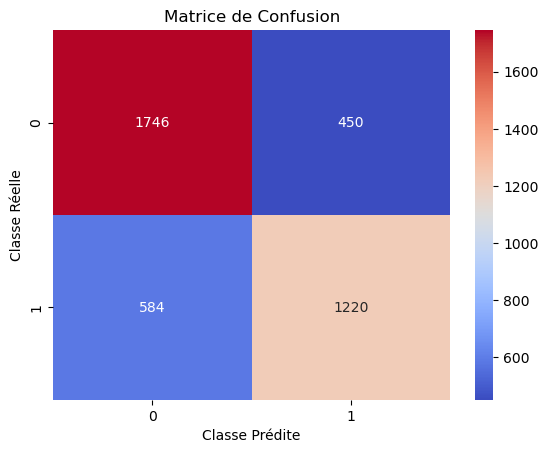

In [600]:
confusion2 = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion2, annot=True, fmt='d', cmap='coolwarm')
print (confusion2)
plt.xlabel('Classe Prédite')
plt.ylabel('Classe Réelle')
plt.title('Matrice de Confusion')
plt.show()

## Courbe roc

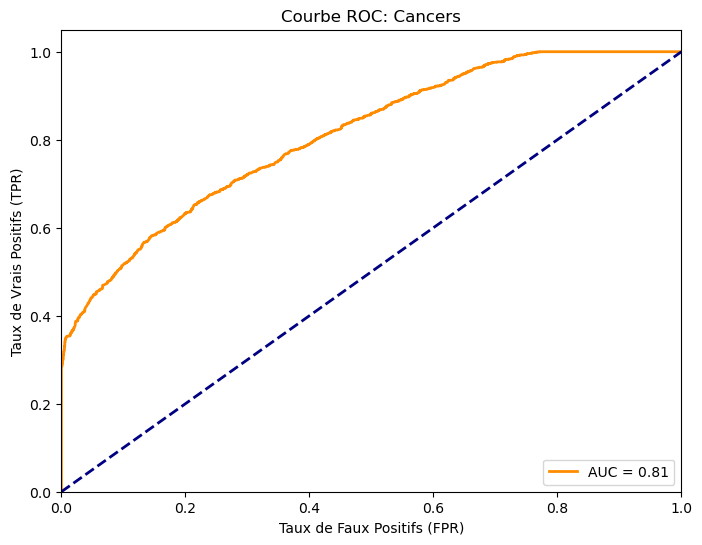

In [598]:
y_true_binary = (y_test2 == 'Maladies cardio-neurovasculaires').astype(int)

y_prob = gbc2.predict_proba(X_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob, pos_label=1)

roc_auc = roc_auc_score(y_true_binary, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC: Cancers')
plt.legend(loc='lower right')
plt.show()

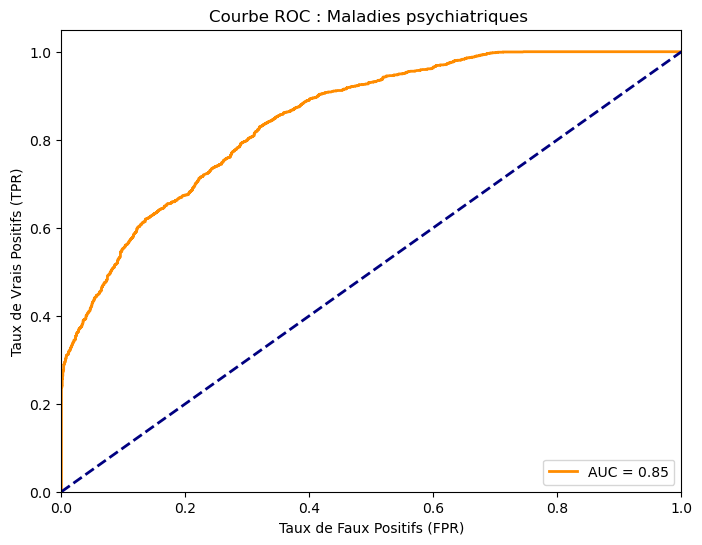

In [599]:
y_true_binary1 = (y_test == 'Maladies psychiatriques').astype(int)

y_prob1 = gbc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_true_binary1, y_prob1, pos_label=1)

roc_auc1 = roc_auc_score(y_true_binary1, y_prob1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC : Maladies psychiatriques ')
plt.legend(loc='lower right')
plt.show()

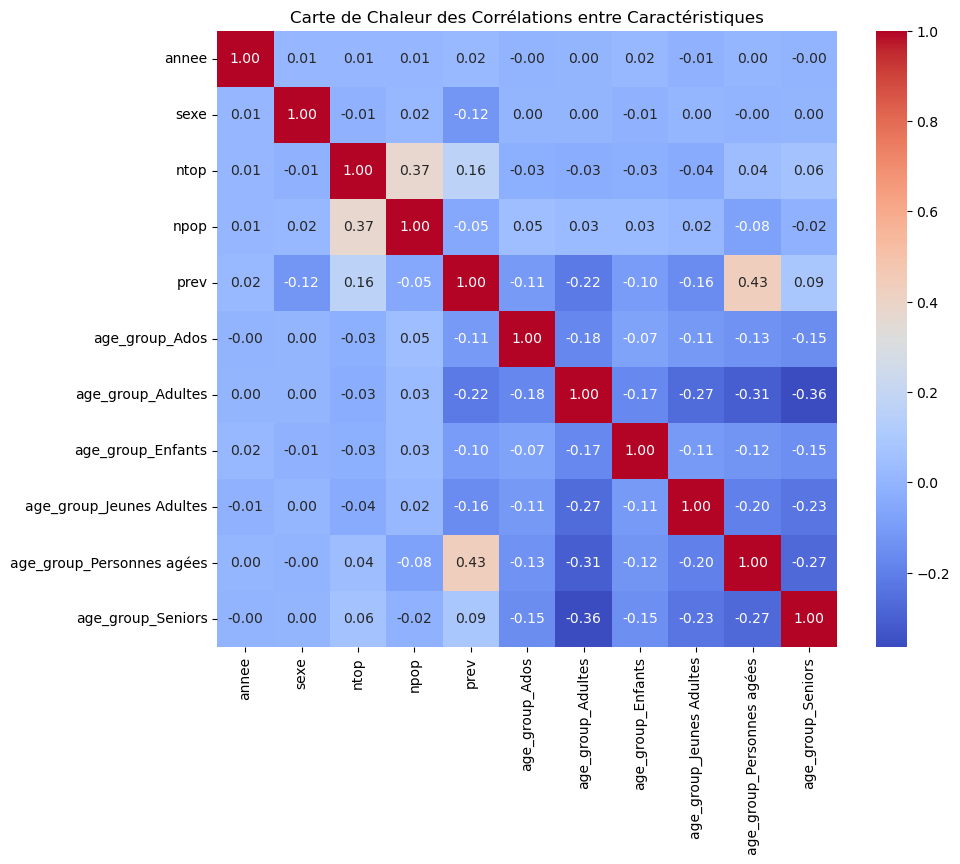

In [568]:
correlation_matrix = X2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Carte des Corrélations entre Caractéristiques")
plt.show()

In [569]:
best_model = GradientBoostingClassifier()
best_model.fit(X_train2, y_train2)

GradientBoostingClassifier()

In [579]:
best_model1 = GradientBoostingClassifier()
best_model1.fit(X_train, y_train)

GradientBoostingClassifier()

In [570]:
shap.initjs()

In [571]:
y_test2.shape

(4000,)

In [572]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test2)

In [581]:
explainer1 = shap.TreeExplainer(best_model1)
shap_values1 = explainer.shap_values(X_test)

In [573]:
shap_values.shape

(4000, 12)

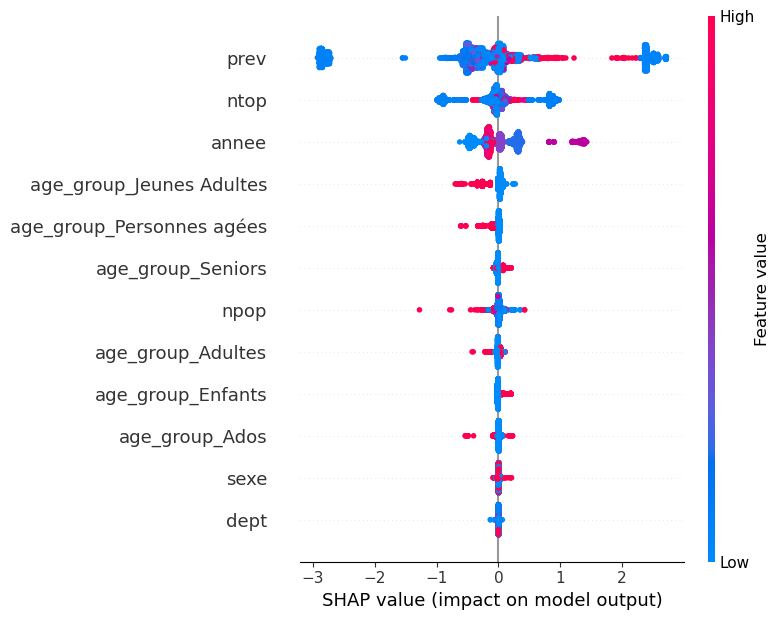

In [574]:
shap.summary_plot(shap_values, X_test2.values, feature_names = X_test2.columns)

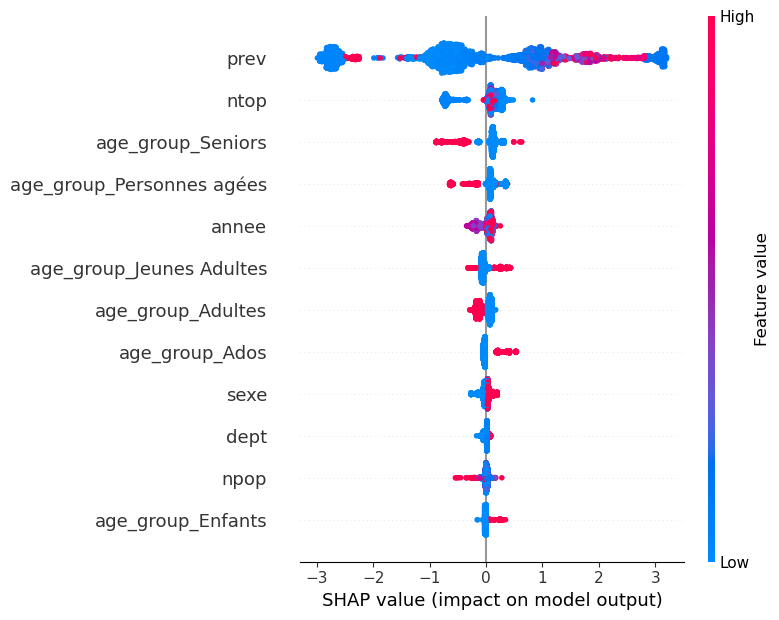

In [582]:
shap.summary_plot(shap_values1, X_test.values, feature_names = X_test.columns)